In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style
import seaborn as sns
import statistics as s
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from scipy.stats import zscore
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

# Problem 1

## 1.1) Ans: 

In [2]:
df = pd.read_excel('Election_Data.xlsx', 'Election_Dataset_Two Classes')

In [3]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
df.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [5]:
df.shape
print('There are', df.shape[0],'rows and', df.shape[1],'columns.')

There are 1525 rows and 10 columns.


In [6]:
df.drop('Unnamed: 0', axis = 1 , inplace = True)

In [7]:
df.head(2)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male


In [8]:
df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [9]:
df.shape

(1525, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [11]:
# Duplicate values
dups=df.duplicated().sum()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 8


In [12]:
#removing duplicates
df.drop_duplicates(inplace=True)

In [13]:
dups=df.duplicated().sum()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [14]:
# Null values
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0


In [16]:
df.describe(include='object').T

,count,unique,top,freq
vote,1517,2,Labour,1057
gender,1517,2,female,808


In [17]:
print('vote \n',df.vote.value_counts())

vote 
 Labour          1057
Conservative     460
Name: vote, dtype: int64


In [18]:
print('gender \n',df.gender.value_counts())

gender 
 female    808
male      709
Name: gender, dtype: int64


In [19]:
df.skew(axis = 0, skipna = True)

age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

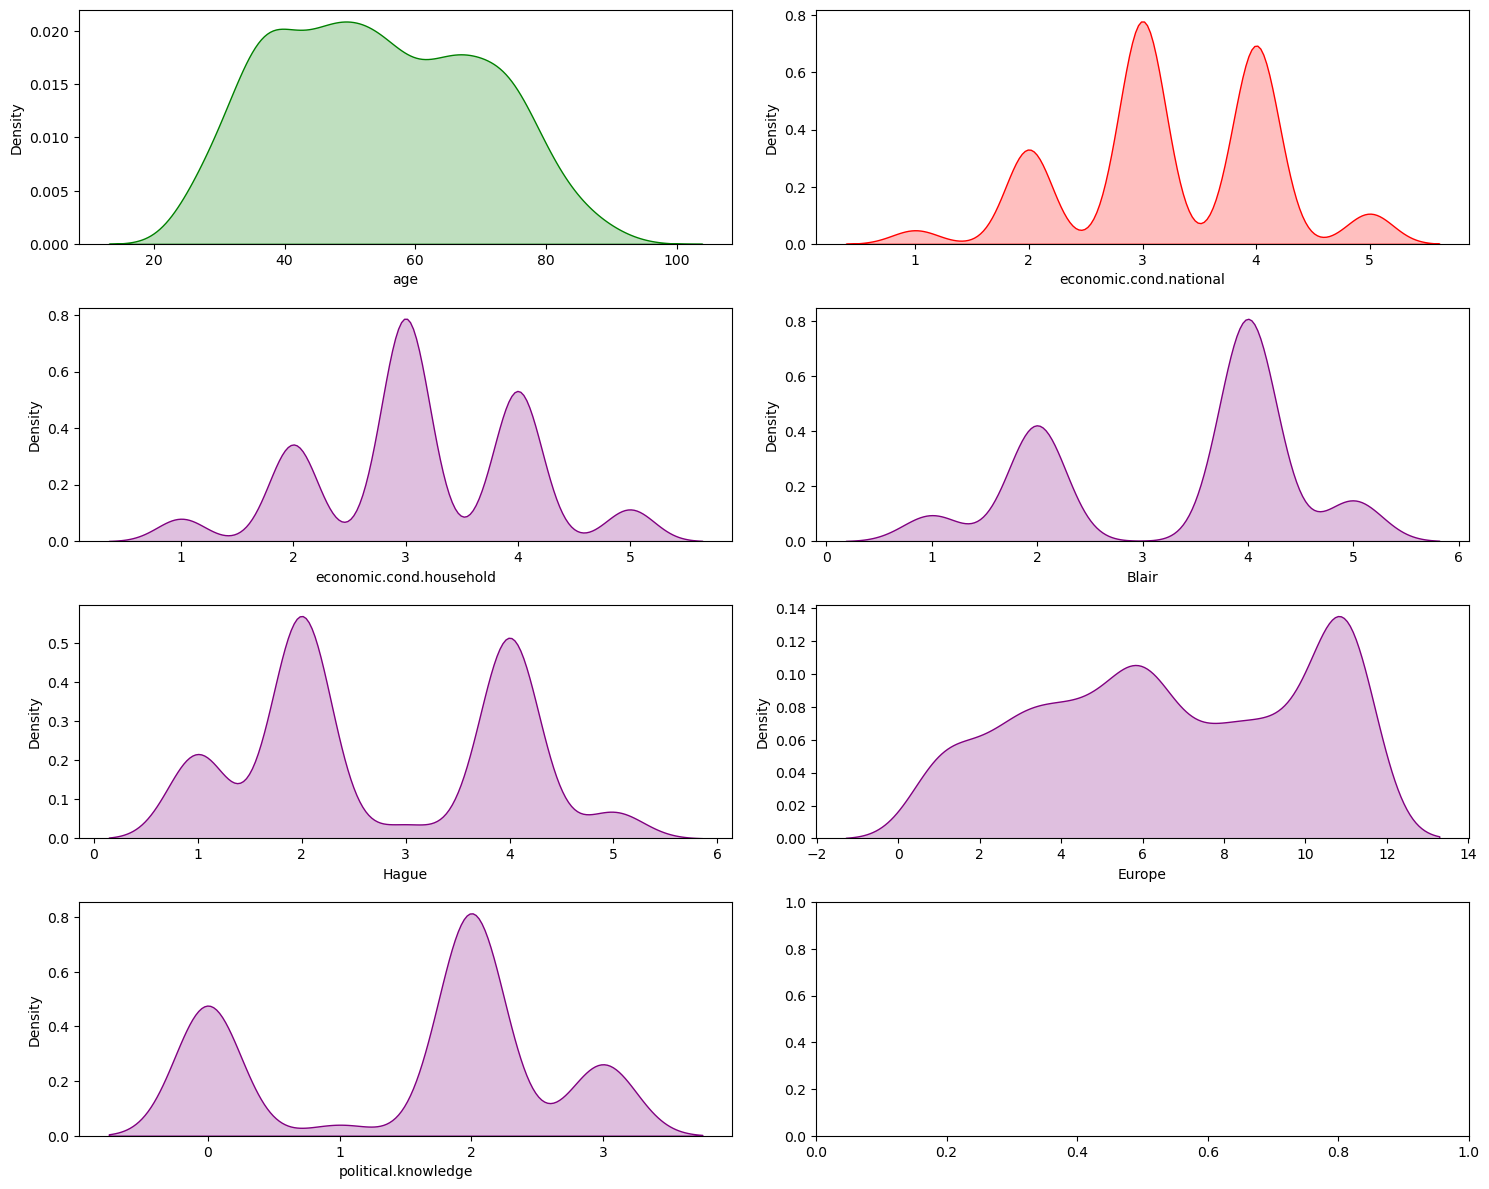

In [20]:
fig, axs = plt.subplots(nrows=4, ncols =2, figsize = (15,12))
sns.kdeplot(x = df.age, fill =True, color = 'green', ax =axs[0,0])
sns.kdeplot(x = df['economic.cond.national'], fill =True, color = 'red', ax =axs[0,1])
sns.kdeplot(x = df['economic.cond.household'], fill =True, color = 'purple', ax =axs[1,0])
sns.kdeplot(x = df['Blair'], fill =True, color = 'purple', ax =axs[1,1])
sns.kdeplot(x = df['Hague'], fill =True, color = 'purple', ax =axs[2,0])
sns.kdeplot(x = df['Europe'], fill =True, color = 'purple', ax =axs[2,1])
sns.kdeplot(x = df['political.knowledge'], fill =True, color = 'purple', ax =axs[3,0])
plt.tight_layout();

## 1.2) Ans: 

In [21]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [22]:
df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [23]:
df.shape
print('There are', df.shape[0],'rows and', df.shape[1],'columns.')

There are 1517 rows and 9 columns.


### Univariate Analysis

In [24]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

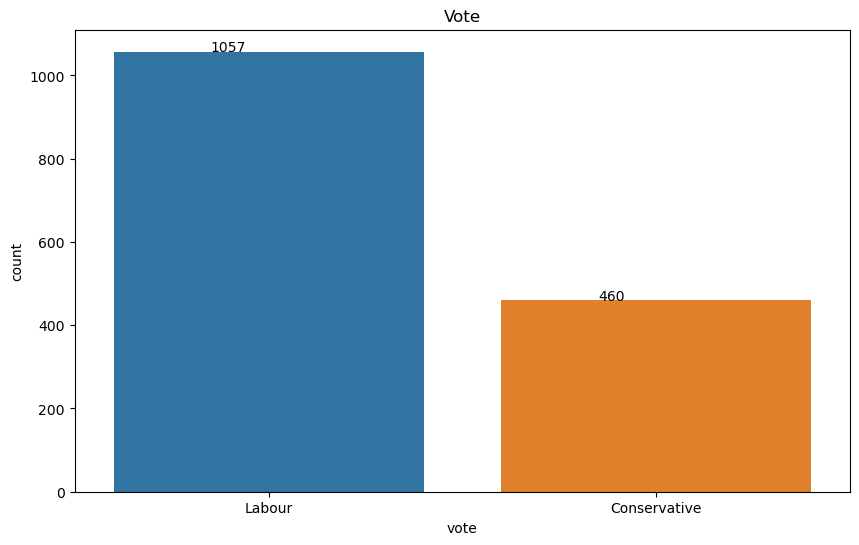

In [25]:
# a) Vote
plt.figure(figsize=(10,6))
ax=sns.countplot(df, x = 'vote')
plt.title('Vote')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

**Observations**
- 1057 of 1517 voters chose Labour party over Conservative party.
- 460 voters chose Conservative party.

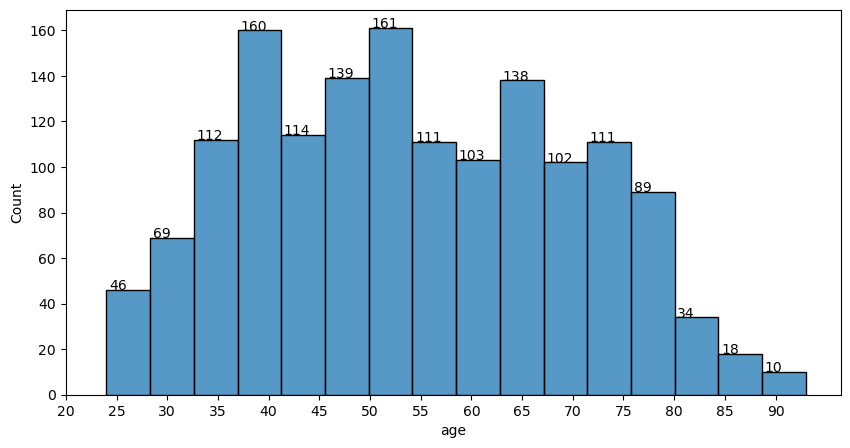

In [26]:
# b) Age
plt.figure(figsize=(10,5))
ax=sns.histplot(df, x = 'age')
plt.xticks(range(20,95,5))
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

In [27]:
df.age.describe()

count    1517.000000
mean       54.241266
std        15.701741
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64

**Observations**
- Average age of voters as per the data is 54 years.
- Minimum age of voter is 24 years and maximum age is 93 years.
- About 75% of data has voters below 67 years.

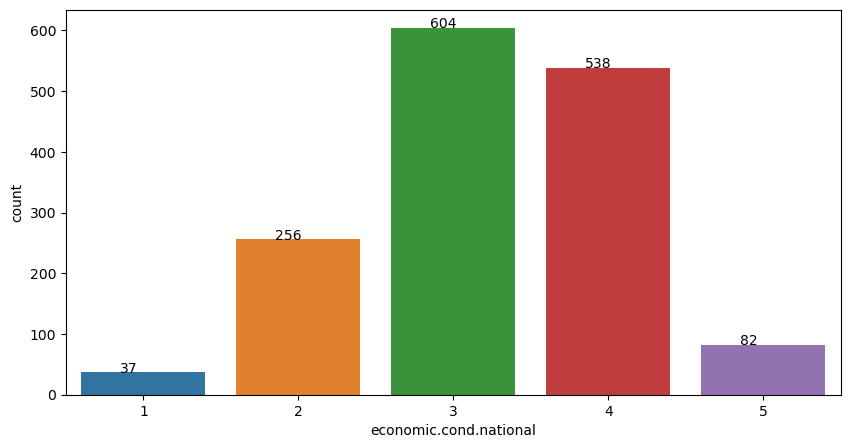

In [28]:
# c) economic.cond.national
plt.figure(figsize=(10,5))
ax=sns.countplot(df, x = 'economic.cond.national')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

**Observations**
- 604 of 1517 voters rated 3 for the current national economic conditions.
- Only 37 voters gave 1 rating for the current national economic conditions.
- 82 voters rated 5 on scale 5 for the current national economic conditions.

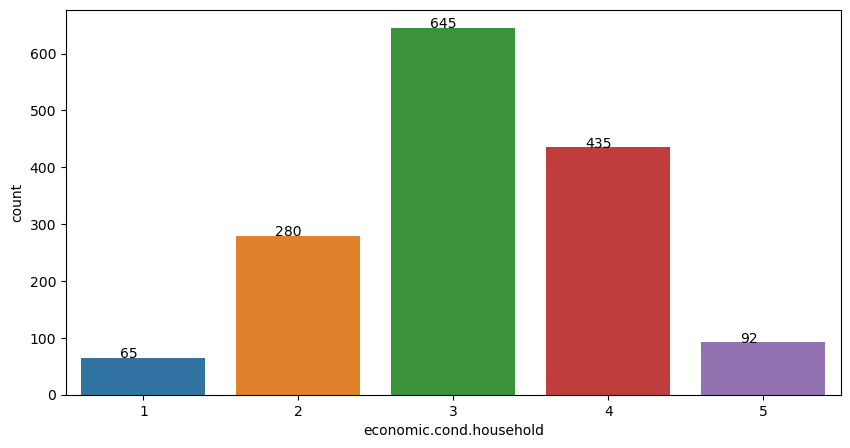

In [29]:
# d) economic.cond.household
plt.figure(figsize=(10,5))
ax=sns.countplot(df, x = 'economic.cond.household')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

**Observations**
- For the current household economic conditions, 65 voters rated 1 and 92 voters rated 5 on the scale of 5.
- Many voters opted 3 rating for the household economic conditions.

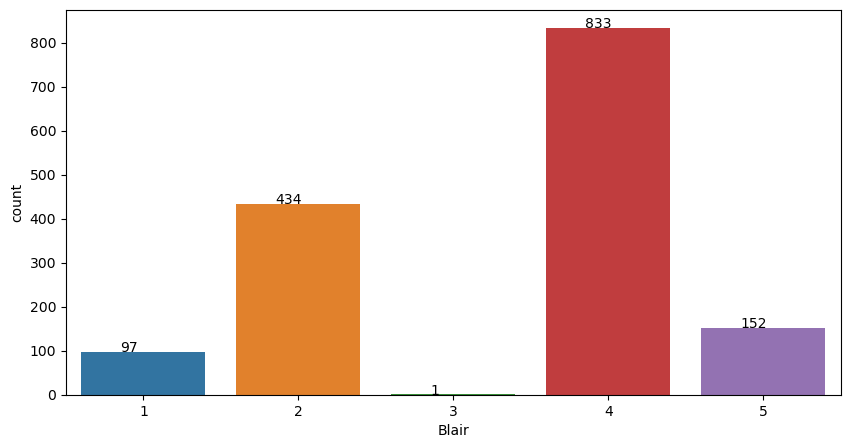

In [30]:
# e) Blair
plt.figure(figsize=(10,5))
ax=sns.countplot(df, x = 'Blair')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

**Observations**
- 97 voters rated 1 for the Labour party leader.
- 152 voters have given a rating of 5 for the Labour party leader.
- Majority of the voters i.e., 833 of them rated 4 for the leader of the Labour party.

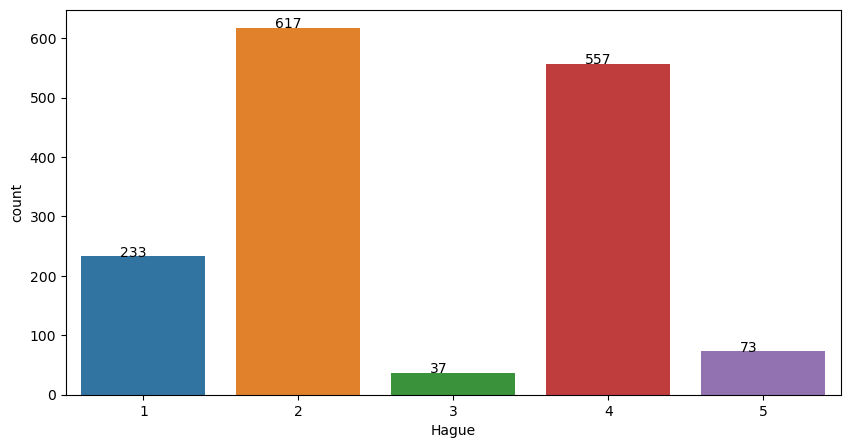

In [31]:
# f) Hague
plt.figure(figsize=(10,5))
ax=sns.countplot(df, x = 'Hague')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

**Observations**
- Of 1517 voter, 73 of them rated 5 for the leader of the Conservative party.
- Majority of the voters i.e., 617 of them rated 2 for the Conservative party leader and 233 voters gave 1 rating.

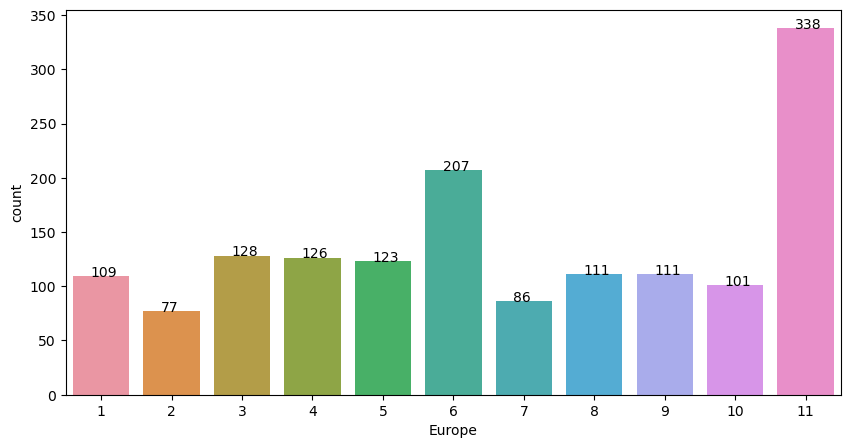

In [32]:
# g) Europe
plt.figure(figsize=(10,5))
ax=sns.countplot(df, x = 'Europe')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

In [33]:
df.Europe.describe()

count    1517.000000
mean        6.740277
std         3.299043
min         1.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        11.000000
Name: Europe, dtype: float64

**Observations**
- About 338 voters rated 11 which means they oppose the European integration.
- 75% of voters rated below 10.
- 50% of voters rated below 6.

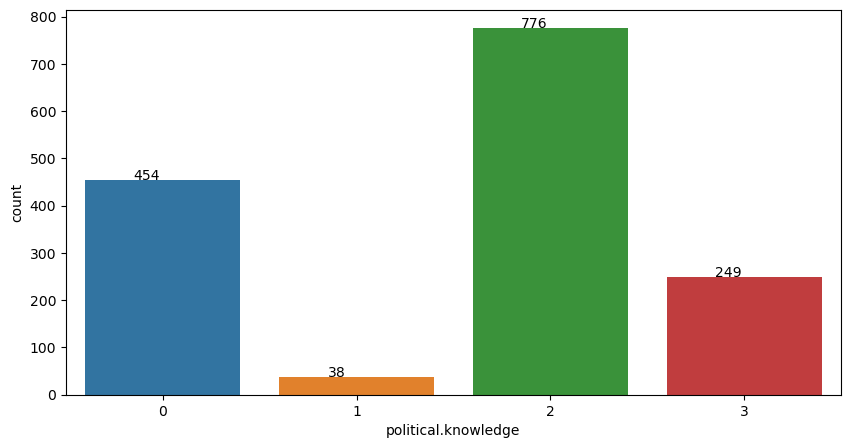

In [34]:
# h) political knowledge
plt.figure(figsize=(10,5))
ax=sns.countplot(df, x = 'political.knowledge')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

**Observations**
- 776 voters have opted 2 on 3 scale about the political knowledge.
- 454 voters have 0 political knowledge.
- 249 voters have in depth political knowledge.

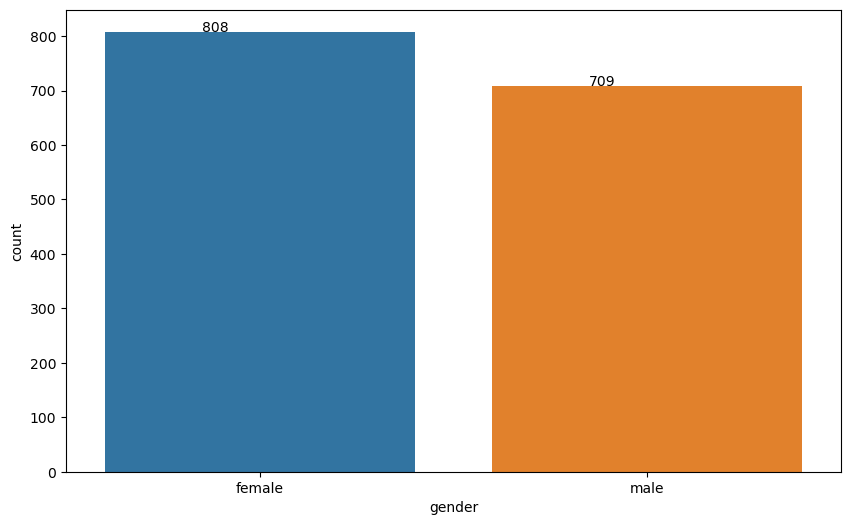

In [35]:
# i) Gender
plt.figure(figsize=(10,6))
ax=sns.countplot(df, x = 'gender')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

**Observations**
- Female voters are more, when compared with Male voters.
- 808 voters are female and 709 voters are male.

### Bivariate Analysis and Multivariate Analysis

In [36]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

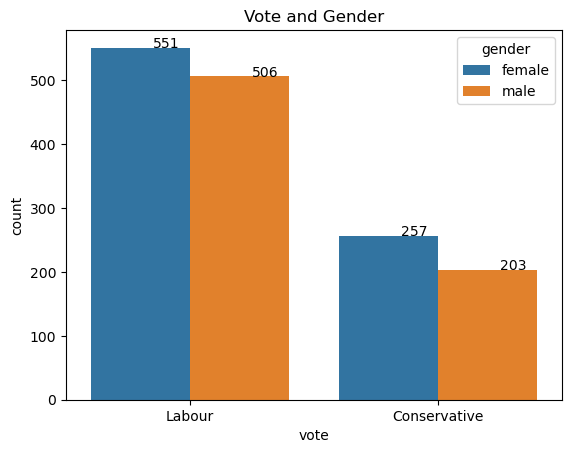

In [37]:
# a) Vote and Gender
ax=sns.countplot(data=df, x='vote', hue='gender') 
plt.title('Vote and Gender')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

**Observations**
- Majority of them have opted Labour party (about 1057) over Conservative party, of which, female voters are more than male voters.
- 460 voters prefer Conservative party, of which, 257 are females and 203 are males.

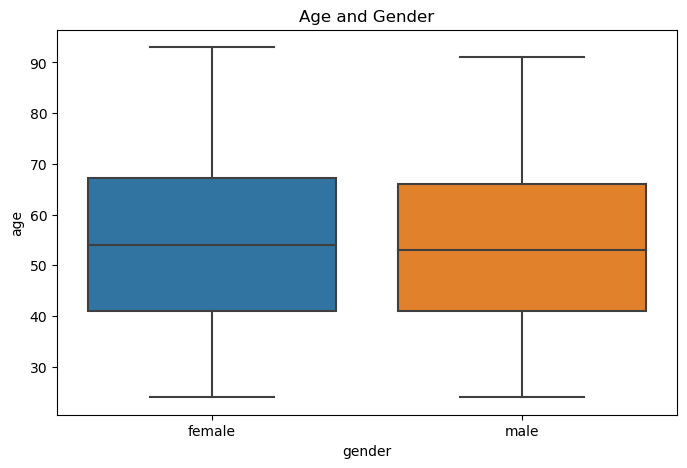

In [38]:
# b) Gender and Age:
plt.figure(figsize=(8,5))
plt.title('Age and Gender')
ax=sns.boxplot(data=df, x="gender", y='age');

In [39]:
df [df['gender']=='female'] ['age'].describe()

count    808.000000
mean      54.504950
std       16.009832
min       24.000000
25%       41.000000
50%       54.000000
75%       67.250000
max       93.000000
Name: age, dtype: float64

In [40]:
df [df['gender']=='male'] ['age'].describe()

count    709.000000
mean      53.940762
std       15.348840
min       24.000000
25%       41.000000
50%       53.000000
75%       66.000000
max       91.000000
Name: age, dtype: float64

**Observations**
- Median age of female voters is 54 years and male voters is 53 years.
- Female voters age ranges from 24 to 93 years.
- Male voters age ranges from 24 to 91 years.

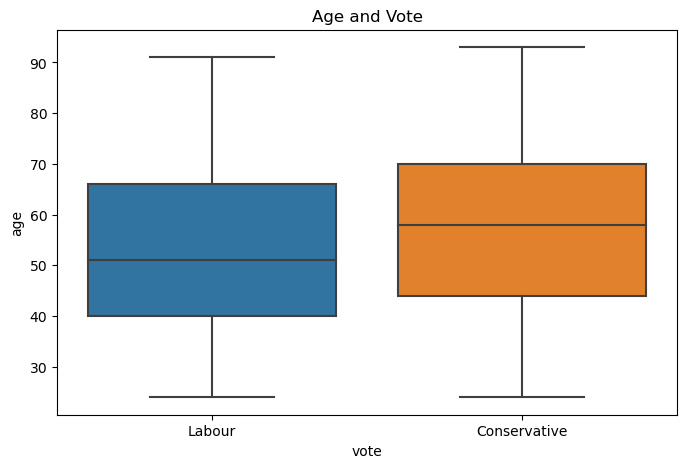

In [41]:
# c) Vote and Age:
plt.figure(figsize=(8,5))
plt.title('Age and Vote')
ax=sns.boxplot(data=df, x="vote", y='age');

In [42]:
df [df['vote']=='Labour'] ['age'].describe()

count    1057.000000
mean       53.109745
std        15.610532
min        24.000000
25%        40.000000
50%        51.000000
75%        66.000000
max        91.000000
Name: age, dtype: float64

In [43]:
df [df['vote']=='Conservative'] ['age'].describe()

count    460.000000
mean      56.841304
std       15.618227
min       24.000000
25%       44.000000
50%       58.000000
75%       70.000000
max       93.000000
Name: age, dtype: float64

**Observations**
- Median age of voters who prefer Labour party is 51 years and those who prefer Conservative party is 58 years.
- About 75% of Labour party voters fall under 66 years of age.
- About 75% of Conservative party voters fall under 70 years of age.

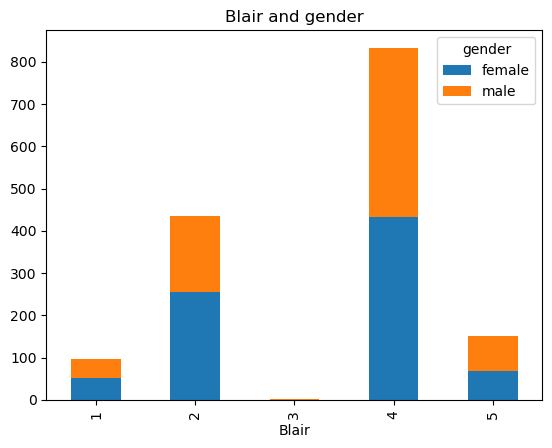

In [44]:
# d) Blair and gender
ct=pd.crosstab(df['Blair'], df['gender'])
ct.plot(kind='bar', stacked=True)
plt.title('Blair and gender');

In [45]:
df.groupby('Blair')[['gender']].value_counts() 

Blair  gender
1      female     52
       male       45
2      female    255
       male      179
3      male        1
4      female    432
       male      401
5      male       83
       female     69
dtype: int64

**Observations**
- From the above graph, we can observe that most of them have given 4 rating to the Labour party leader, of which 432 are females and 401 are males.
- Only 1 voter has given 3 rating.
- 83 male voters and 69 female voters have given 5 rating on scale of 5.

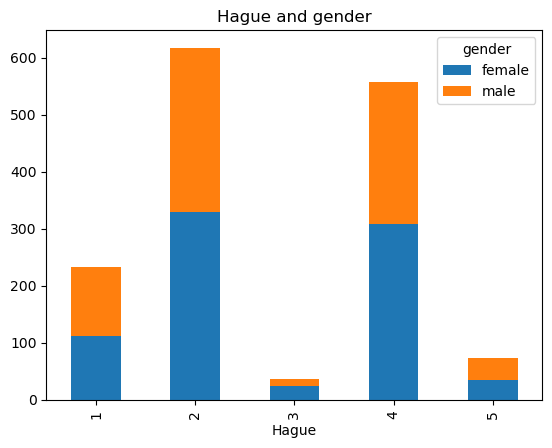

In [46]:
# e) Hague and gender
ct=pd.crosstab(df['Hague'], df['gender'])
ct.plot(kind='bar', stacked=True)
plt.title('Hague and gender');

In [47]:
df.groupby('Hague')[['gender']].value_counts() 

Hague  gender
1      male      121
       female    112
2      female    329
       male      288
3      female     24
       male       13
4      female    309
       male      248
5      male       39
       female     34
dtype: int64

**Observations**
- We can observe that most of them have given 2 rating to the Conservative party leader, of which 329 are females and 288 are males.
- 309 female voters and 248 male voters have given 4 rating to the leader of Conservative party, which is less when compared with rating given to the Labour party leader.

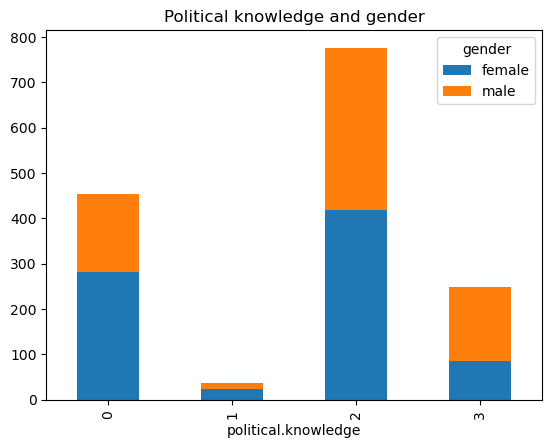

In [48]:
# f) Political knowledge and gender:
ct=pd.crosstab(df['political.knowledge'], df['gender'])
ct.plot(kind='bar', stacked=True)
plt.title('Political knowledge and gender');

In [49]:
df.groupby('political.knowledge')[['gender']].value_counts() 

political.knowledge  gender
0                    female    281
                     male      173
1                    female     23
                     male       15
2                    female    419
                     male      357
3                    male      164
                     female     85
dtype: int64

**Observations**
- 454 of 1517 voters have zero knowledge in politics, of which 281 are females and 173 are males.
- 164 male voters and 85 female voters have good knowledge in politics.

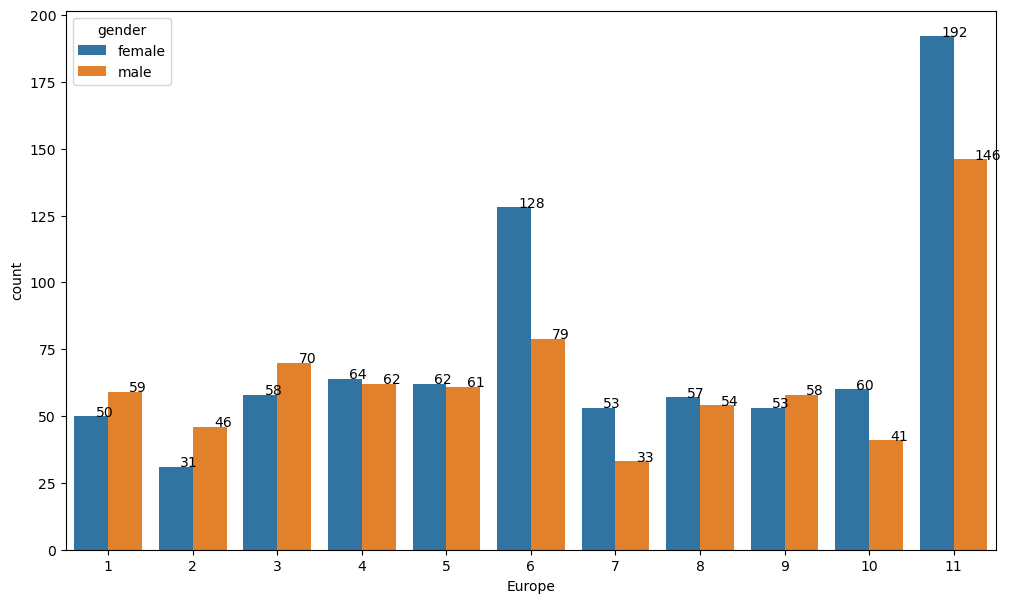

In [50]:
# g) Gender and Europe
plt.figure(figsize=(12,7))
ax=sns.countplot(df, x = 'Europe', hue='gender')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

**Observations**
- Most of the voters oppose European integration, i.e., about 192 female voters and 146 male voters have given 11 on scale 11.
- We can also see an increase in the point 6, of which 128 are females and 79 are males.
- 50 female voters and 59 male voters have 1 point, i.e., on the favour of  European integration.

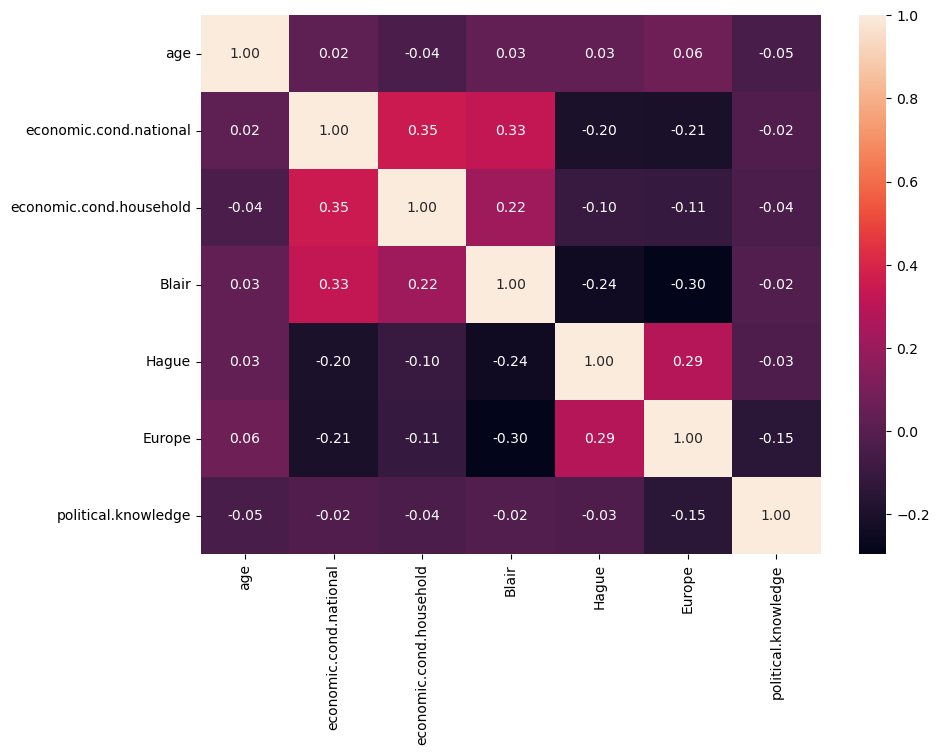

In [51]:
# h) Correlation
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), annot=True,fmt='.2f');

**Observations**
- Current national economic conditions and Current household economic conditions are positively correlated with the correlation of 0.35.
- Current national economic conditions and Blair are positively correlated with the correlation of 0.33.
- Europe and Blair are negatively correlated with the correlation of -0.30.
- Europe and Current national economic conditions are negatively correlated with the correlation of -0.21.

### Outliers

In [52]:
# Outliers
df_num = df.select_dtypes(include=['float64','int64'])
df_num.columns

Index(['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge'],
      dtype='object')

age


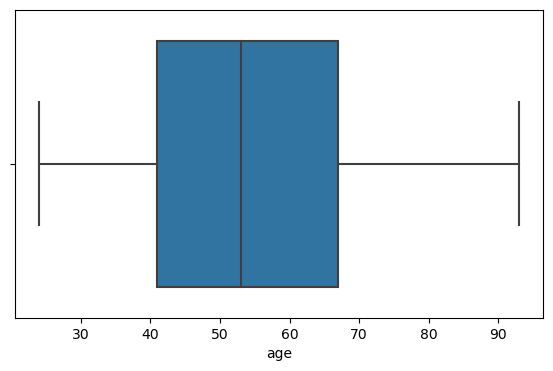

economic.cond.national


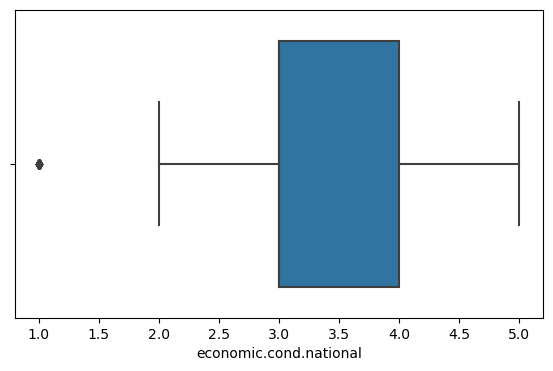

economic.cond.household


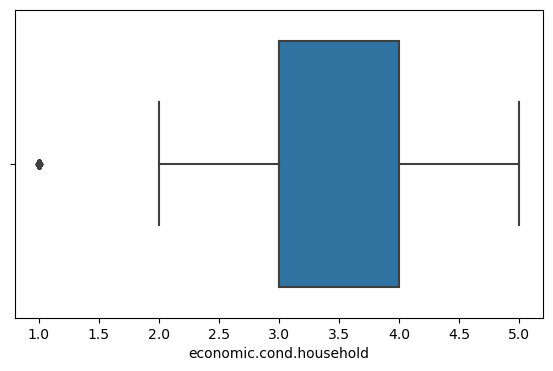

Blair


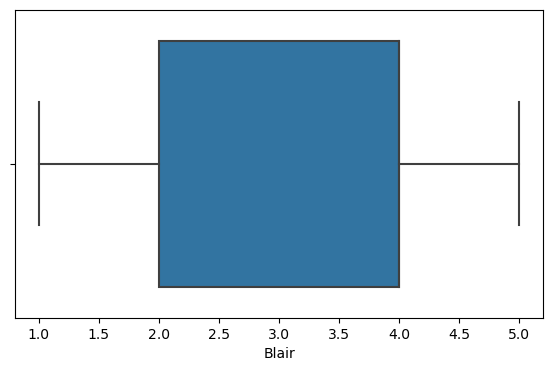

Hague


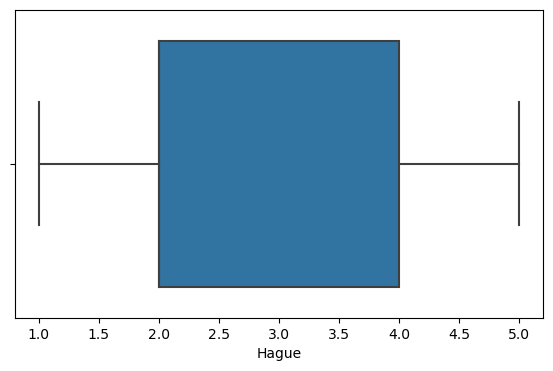

Europe


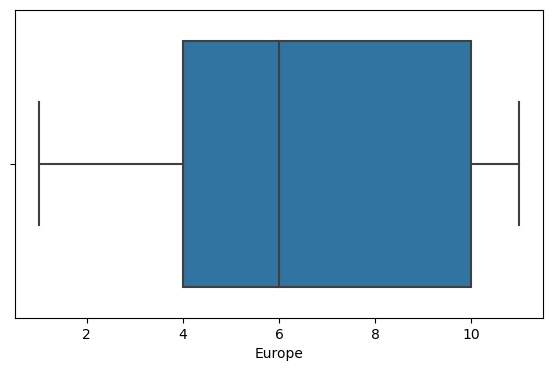

political.knowledge


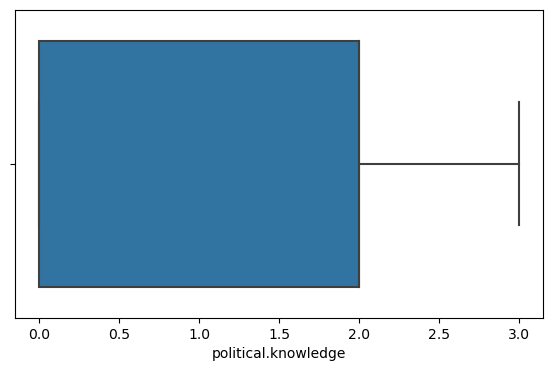

In [53]:
for col in df_num.columns[0:]:
    print(col)
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.boxplot(x=df_num[col])
    plt.show()

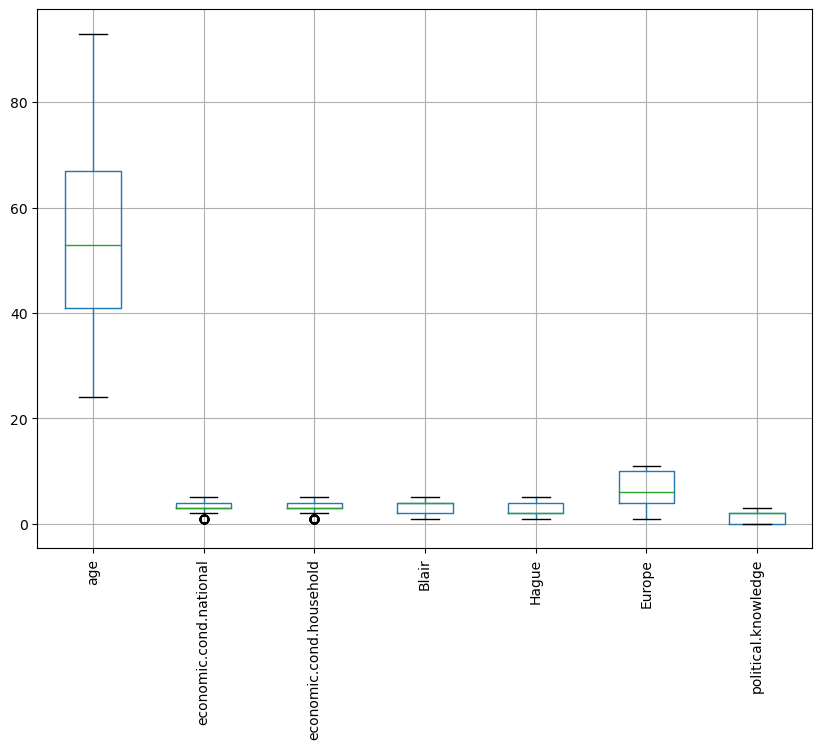

In [54]:
df_num.boxplot(figsize=(10,7))
plt.xticks(rotation=90)
plt.show()

### Treating outliers

In [55]:
# Treating outliers
def treat_outlier(x):
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    IQR=q75-q25
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    return x.apply(lambda y: q5 if y < lower_bound else y).apply(lambda y: dt if y > upper_bound else y)

In [56]:
for i in df_num.columns:    
    df_num[i]=treat_outlier(df_num[i])

age


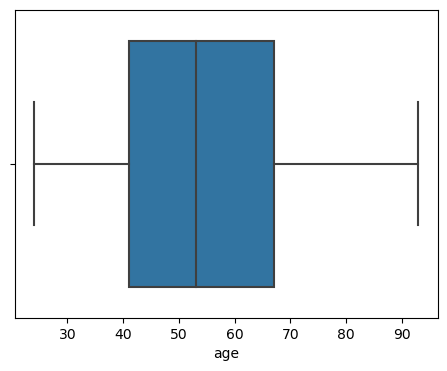

economic.cond.national


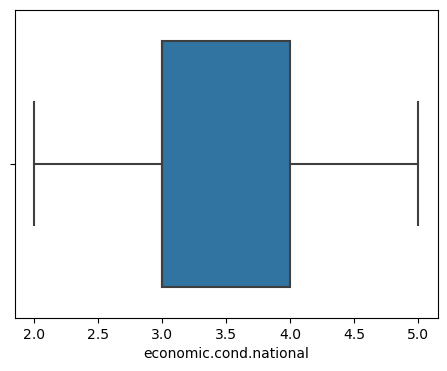

economic.cond.household


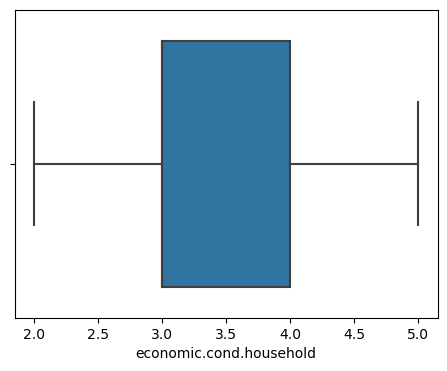

Blair


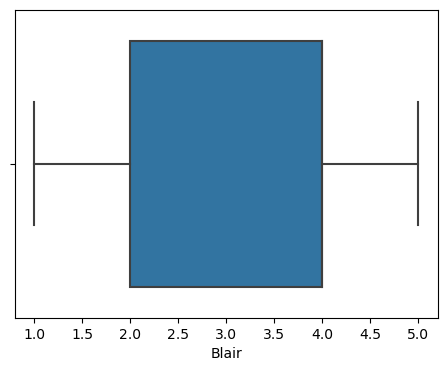

Hague


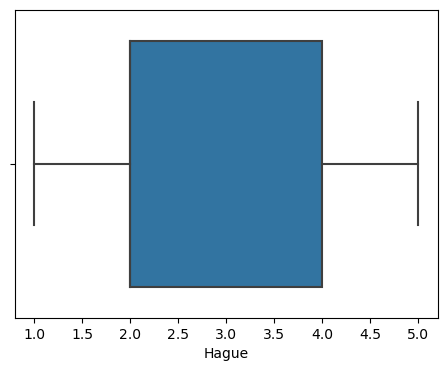

Europe


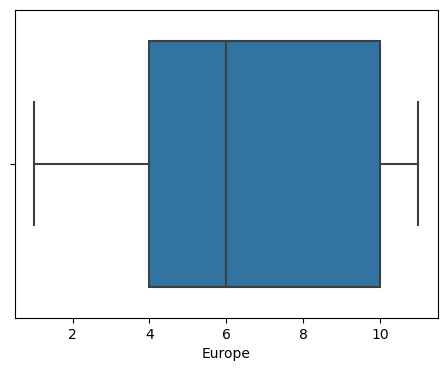

political.knowledge


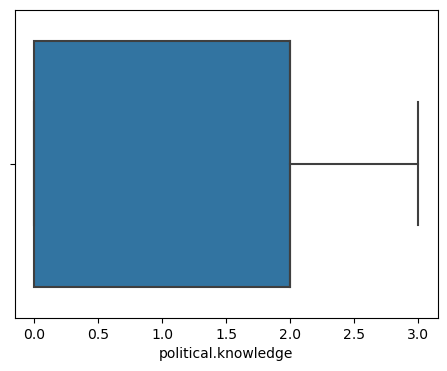

In [57]:
for col in df_num.columns[0:]:
    print(col)
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.boxplot(x=df_num[col])
    plt.show()

## 1.3) Ans: 

In [58]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [59]:
df['vote']=df['vote'].astype('category')
df['gender']=df['gender'].astype('category')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   vote                     1517 non-null   category
 1   age                      1517 non-null   int64   
 2   economic.cond.national   1517 non-null   int64   
 3   economic.cond.household  1517 non-null   int64   
 4   Blair                    1517 non-null   int64   
 5   Hague                    1517 non-null   int64   
 6   Europe                   1517 non-null   int64   
 7   political.knowledge      1517 non-null   int64   
 8   gender                   1517 non-null   category
dtypes: category(2), int64(7)
memory usage: 98.0 KB


In [61]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [62]:
# Applying Label Encoder object for the target class
df_n = df.copy()
df_n['vote'] = LE.fit_transform(df_n['vote'])
df_n.head(3)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,female
1,1,36,4,4,4,4,5,2,male
2,1,35,4,4,5,2,3,2,male


In [63]:
# Converting the other 'object' type variables as dummy variables
df_n_dummy = pd.get_dummies(df_n,drop_first=True)
df_n_dummy.head(3)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1


**Train Test Split**

In [64]:
X = df_n_dummy.drop('vote', axis=1)
 
y = df_n_dummy['vote']

In [65]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=123, stratify=y)

In [66]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (1061, 8)
Number of rows and columns of the training set for the dependent variable: (1061,)
Number of rows and columns of the test set for the independent variables: (456, 8)
Number of rows and columns of the test set for the dependent variable: (456,)


In [67]:
y_train.value_counts()

1    739
0    322
Name: vote, dtype: int64

In [68]:
y_test.value_counts()

1    318
0    138
Name: vote, dtype: int64

### Standard deviation and Variance of original data

In [69]:
og_train=pd.DataFrame([X_train.mean(), X_train.std(), X_train.var()], index=['Mean', 'Std. dev', 'Variance'])

In [70]:
og_train

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
Mean,54.147031,3.267672,3.131951,3.330820,2.758718,6.755891,1.545712,0.482564
Std. dev,15.555957,0.890188,0.933409,1.181972,1.241663,3.346327,1.084641,0.499932
Variance,241.987795,0.792435,0.871252,1.397059,1.541728,11.197902,1.176446,0.249932


In [71]:
og_test=pd.DataFrame([X_test.mean(), X_test.std(), X_test.var()], index=['Mean', 'Std. dev', 'Variance'])

In [72]:
og_test

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
Mean,54.460526,3.192982,3.151316,3.346491,2.728070,6.703947,1.528509,0.432018
Std. dev,16.050969,0.860638,0.926484,1.159058,1.211919,3.189624,1.084992,0.495901
Variance,257.633603,0.740698,0.858372,1.343416,1.468749,10.173699,1.177207,0.245918


### Scaling data

In [73]:
# Train data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_train=pd.DataFrame(scaled_X_train, columns=X_train.columns)
scaled_X_train.head(3)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,0.287879,0.75,0.25,1.00,0.00,0.5,0.000000,0.0
1,0.363636,0.25,0.25,0.25,0.75,0.8,0.666667,0.0
2,0.772727,0.75,0.75,0.75,0.00,1.0,0.000000,1.0


In [74]:
X_train.shape

(1061, 8)

In [75]:
# Test data
scaler = MinMaxScaler().fit(X_test)

scaled_X_test = scaler.transform(X_test)
scaled_X_test=pd.DataFrame(scaled_X_test, columns=X_test.columns)
scaled_X_test.head(3)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,0.768116,0.25,0.50,0.25,0.25,0.9,0.666667,0.0
1,0.536232,0.75,0.50,1.00,0.00,0.0,0.666667,1.0
2,0.376812,0.75,0.25,0.75,0.25,0.4,0.666667,1.0


In [76]:
X_test.shape

(456, 8)

### Standard deviation and Variance of scaled data

In [77]:
scaled_data_train=pd.DataFrame([scaled_X_train.mean(), scaled_X_train.std(), scaled_X_train.var()], index=['Mean', 'Std. dev', 'Variance'])

In [78]:
scaled_data_train

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
Mean,0.456773,0.566918,0.532988,0.582705,0.439680,0.575589,0.515237,0.482564
Std. dev,0.235696,0.222547,0.233352,0.295493,0.310416,0.334633,0.361547,0.499932
Variance,0.055553,0.049527,0.054453,0.087316,0.096358,0.111979,0.130716,0.249932


In [79]:
scaled_data_test=pd.DataFrame([scaled_X_test.mean(), scaled_X_test.std(), scaled_X_test.var()], index=['Mean', 'Std. dev', 'Variance'])

In [80]:
scaled_data_test

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
Mean,0.441457,0.548246,0.537829,0.586623,0.432018,0.570395,0.509503,0.432018
Std. dev,0.232623,0.215160,0.231621,0.289765,0.302980,0.318962,0.361664,0.495901
Variance,0.054113,0.046294,0.053648,0.083964,0.091797,0.101737,0.130801,0.245918


## 1.4) Ans: 

### SMOTE - Over sampling the data

In [81]:
from numpy import where
from collections import Counter
from imblearn.over_sampling import SMOTE

In [82]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=123)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(scaled_X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 739
Before UpSampling, counts of label 'No': 322 

After UpSampling, counts of label 'Yes': 739
After UpSampling, counts of label 'No': 739 

After UpSampling, the shape of train_X: (1478, 8)
After UpSampling, the shape of train_y: (1478,) 



### a) Logistic Regression

In [83]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train_over, y_train_over)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    6.4s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [84]:
ytrain_predict = model.predict(X_train_over)
ytest_predict = model.predict(scaled_X_test)

In [85]:
X_train_over.head(3)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,0.287879,0.75,0.25,1.00,0.00,0.5,0.000000,0.0
1,0.363636,0.25,0.25,0.25,0.75,0.8,0.666667,0.0
2,0.772727,0.75,0.75,0.75,0.00,1.0,0.000000,1.0


### Predicting on Training and Test dataset

In [86]:
model.predict_proba(X_train_over)

array([[0.00864217, 0.99135783],
       [0.93993231, 0.06006769],
       [0.09012599, 0.90987401],
       ...,
       [0.87322012, 0.12677988],
       [0.94065167, 0.05934833],
       [0.46912457, 0.53087543]])

### Getting the Predicted Classes and Probs

In [87]:
ytest_predict_prob=model.predict_proba(scaled_X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.841338,0.158662
1,0.005966,0.994034
2,0.063849,0.936151
3,0.467016,0.532984
4,0.131644,0.868356


## Model Evaluation

In [88]:
# Accuracy - Training Data
model.score(X_train_over, y_train_over)

0.8342354533152909

In [89]:
scaled_X_test.shape

(456, 8)

### AUC and ROC for the training data

AUC: 0.903


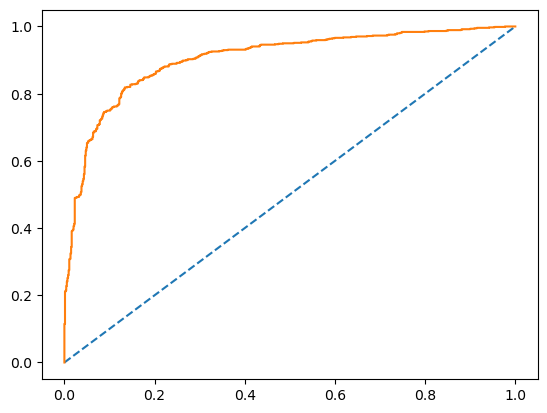

In [90]:
probs = model.predict_proba(X_train_over)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_over, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_over, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [91]:
# Accuracy - Test Data
model.score(scaled_X_test, y_test)

0.8004385964912281

### AUC and ROC for the test data

AUC: 0.903


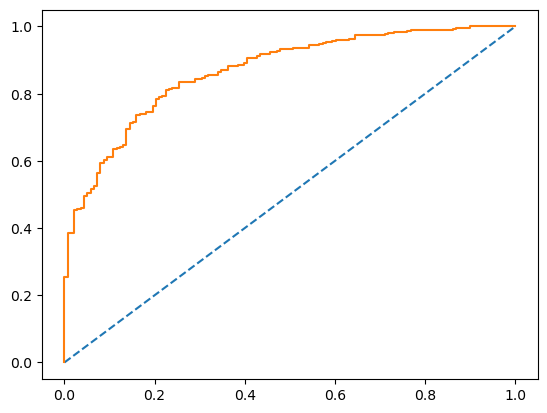

In [92]:
probs = model.predict_proba(scaled_X_test)
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion Matrix for the training data

In [93]:
confusion_matrix(y_train_over, ytrain_predict)

array([[620, 119],
       [126, 613]], dtype=int64)

In [94]:
print(classification_report(y_train_over, ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       739
           1       0.84      0.83      0.83       739

    accuracy                           0.83      1478
   macro avg       0.83      0.83      0.83      1478
weighted avg       0.83      0.83      0.83      1478



### Confusion Matrix for test data

In [95]:
confusion_matrix(y_test, ytest_predict)

array([[106,  32],
       [ 59, 259]], dtype=int64)

In [96]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.64      0.77      0.70       138
           1       0.89      0.81      0.85       318

    accuracy                           0.80       456
   macro avg       0.77      0.79      0.78       456
weighted avg       0.82      0.80      0.80       456



### b) LDA

In [97]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model1=clf.fit(X_train_over,y_train_over)

In [98]:
ytrain_predict_LDA = model1.predict(X_train_over)
ytest_predict_LDA = model1.predict(scaled_X_test)

### Predicting on Training and Test dataset

In [99]:
model1.predict_proba(X_train_over)

array([[0.00424874, 0.99575126],
       [0.95774766, 0.04225234],
       [0.06379139, 0.93620861],
       ...,
       [0.88505049, 0.11494951],
       [0.96189159, 0.03810841],
       [0.46384007, 0.53615993]])

### Getting the Predicted Classes and Probs

In [100]:
ytest_predict_prob=model1.predict_proba(scaled_X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.857482,0.142518
1,0.003275,0.996725
2,0.050291,0.949709
3,0.454824,0.545176
4,0.108725,0.891275


## Model Evaluation

In [101]:
# Accuracy - Training Data
model1.score(X_train_over, y_train_over)

0.8322056833558863

### AUC and ROC for the training data

AUC: 0.903


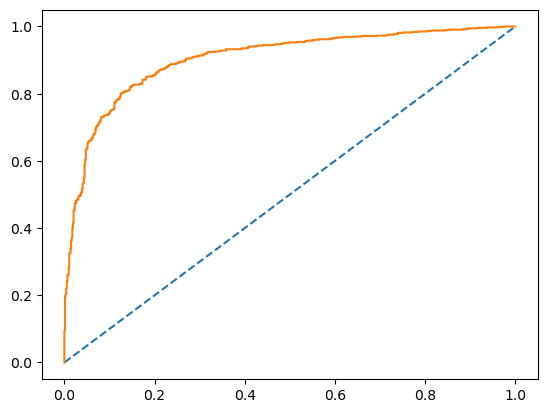

In [102]:
probs = model1.predict_proba(X_train_over)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_over, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_over, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [103]:
# Accuracy - Test Data
model1.score(scaled_X_test, y_test)

0.7982456140350878

### AUC and ROC for the test data

AUC: 0.903


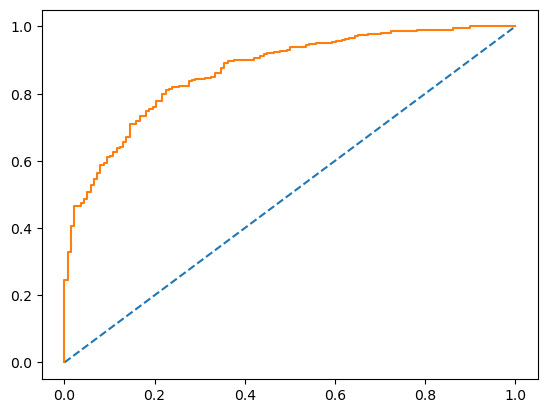

In [104]:
probs = model1.predict_proba(scaled_X_test)
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion Matrix for the training data

In [105]:
confusion_matrix(y_train_over, ytrain_predict_LDA)

array([[618, 121],
       [127, 612]], dtype=int64)

In [106]:
print(classification_report(y_train_over, ytrain_predict_LDA))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       739
           1       0.83      0.83      0.83       739

    accuracy                           0.83      1478
   macro avg       0.83      0.83      0.83      1478
weighted avg       0.83      0.83      0.83      1478



### Confusion Matrix for test data

In [107]:
confusion_matrix(y_test, ytest_predict_LDA)

array([[106,  32],
       [ 60, 258]], dtype=int64)

In [108]:
print(classification_report(y_test, ytest_predict_LDA))

              precision    recall  f1-score   support

           0       0.64      0.77      0.70       138
           1       0.89      0.81      0.85       318

    accuracy                           0.80       456
   macro avg       0.76      0.79      0.77       456
weighted avg       0.81      0.80      0.80       456



## 1.5) Ans: 

### Gaussian Naive Bayes

In [109]:
from sklearn import metrics

In [110]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

**Performance Matrix on train data set**

In [111]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                   
print(model_score)

0.8397737983034873


In [112]:
# confusion_matrix
print(metrics.confusion_matrix(y_train, y_train_predict))

[[232  90]
 [ 80 659]]


In [113]:
# classification_report
print(metrics.classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       322
           1       0.88      0.89      0.89       739

    accuracy                           0.84      1061
   macro avg       0.81      0.81      0.81      1061
weighted avg       0.84      0.84      0.84      1061



In [114]:
# Accuracy of train data
NB_model.score(X_train, y_train)

0.8397737983034873

**Performance Matrix on test data set**

In [115]:
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)

0.8289473684210527


In [116]:
# confusion_matrix
print(metrics.confusion_matrix(y_test, y_test_predict))        

[[ 97  41]
 [ 37 281]]


In [117]:
# classification_report
print(metrics.classification_report(y_test, y_test_predict)) 

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       138
           1       0.87      0.88      0.88       318

    accuracy                           0.83       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



In [118]:
# Accuracy of test data
NB_model.score(X_test, y_test)

0.8289473684210527

### KNN model

In [119]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(scaled_X_train,y_train)

KNeighborsClassifier()

**Performance Matrix on train data set**

In [120]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(scaled_X_train)
model_score = KNN_model.score(scaled_X_train, y_train)
print(model_score)

0.883129123468426


In [121]:
print(metrics.confusion_matrix(y_train, y_train_predict))

[[251  71]
 [ 53 686]]


In [122]:
print(metrics.classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       322
           1       0.91      0.93      0.92       739

    accuracy                           0.88      1061
   macro avg       0.87      0.85      0.86      1061
weighted avg       0.88      0.88      0.88      1061



**Performance Matrix on test data set**

In [123]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(scaled_X_test)
model_score = KNN_model.score(scaled_X_test, y_test)
print(model_score)

0.7741228070175439


In [124]:
print(metrics.confusion_matrix(y_test, y_test_predict))

[[ 90  48]
 [ 55 263]]


In [125]:
print(metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.62      0.65      0.64       138
           1       0.85      0.83      0.84       318

    accuracy                           0.77       456
   macro avg       0.73      0.74      0.74       456
weighted avg       0.78      0.77      0.78       456



In [126]:
# MCE
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaled_X_train, y_train)
    scores = knn.score(scaled_X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.2543859649122807,
 0.2192982456140351,
 0.22587719298245612,
 0.21271929824561409,
 0.20833333333333337,
 0.20175438596491224,
 0.1885964912280702,
 0.1885964912280702,
 0.19736842105263153,
 0.20175438596491224]

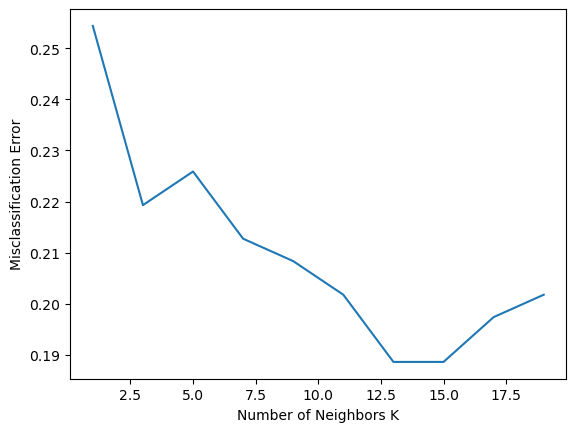

In [127]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [128]:
KNN_model=KNeighborsClassifier(n_neighbors=11)
KNN_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [129]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(scaled_X_train)
model_score = KNN_model.score(scaled_X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8605089538171536
[[233  89]
 [ 59 680]]
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       322
           1       0.88      0.92      0.90       739

    accuracy                           0.86      1061
   macro avg       0.84      0.82      0.83      1061
weighted avg       0.86      0.86      0.86      1061



In [130]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(scaled_X_test)
model_score = KNN_model.score(scaled_X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7982456140350878
[[ 87  51]
 [ 41 277]]
              precision    recall  f1-score   support

           0       0.68      0.63      0.65       138
           1       0.84      0.87      0.86       318

    accuracy                           0.80       456
   macro avg       0.76      0.75      0.76       456
weighted avg       0.79      0.80      0.80       456



In [131]:
KNN_model=KNeighborsClassifier(n_neighbors=13)
KNN_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [132]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(scaled_X_train)
model_score = KNN_model.score(scaled_X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8548539114043355
[[229  93]
 [ 61 678]]
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       322
           1       0.88      0.92      0.90       739

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



In [133]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(scaled_X_test)
model_score = KNN_model.score(scaled_X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8114035087719298
[[ 88  50]
 [ 36 282]]
              precision    recall  f1-score   support

           0       0.71      0.64      0.67       138
           1       0.85      0.89      0.87       318

    accuracy                           0.81       456
   macro avg       0.78      0.76      0.77       456
weighted avg       0.81      0.81      0.81       456



In [134]:
KNN_model=KNeighborsClassifier(n_neighbors=15)
KNN_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [135]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(scaled_X_train)
model_score = KNN_model.score(scaled_X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8520263901979265
[[231  91]
 [ 66 673]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       322
           1       0.88      0.91      0.90       739

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



In [136]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(scaled_X_test)
model_score = KNN_model.score(scaled_X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8114035087719298
[[ 88  50]
 [ 36 282]]
              precision    recall  f1-score   support

           0       0.71      0.64      0.67       138
           1       0.85      0.89      0.87       318

    accuracy                           0.81       456
   macro avg       0.78      0.76      0.77       456
weighted avg       0.81      0.81      0.81       456



# 1.6) Ans & 1.7) Ans:

### a) KNN model

In [137]:
KNN_model=KNeighborsClassifier(n_neighbors=15)
KNN_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [138]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(scaled_X_train)
model_score = KNN_model.score(scaled_X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8520263901979265
[[231  91]
 [ 66 673]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       322
           1       0.88      0.91      0.90       739

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



In [139]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(scaled_X_test)
model_score = KNN_model.score(scaled_X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8114035087719298
[[ 88  50]
 [ 36 282]]
              precision    recall  f1-score   support

           0       0.71      0.64      0.67       138
           1       0.85      0.89      0.87       318

    accuracy                           0.81       456
   macro avg       0.78      0.76      0.77       456
weighted avg       0.81      0.81      0.81       456



### AUC and ROC for the train data

AUC: 0.918


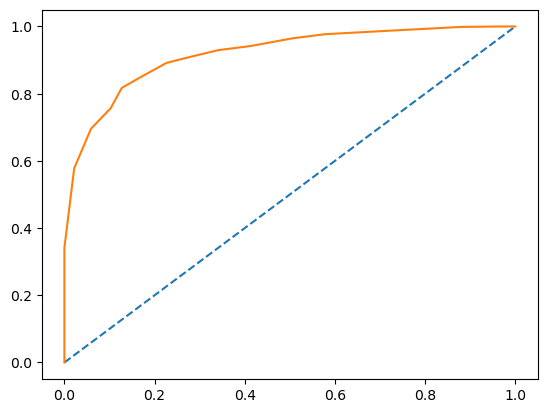

In [140]:
probs = KNN_model.predict_proba(scaled_X_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 0.918


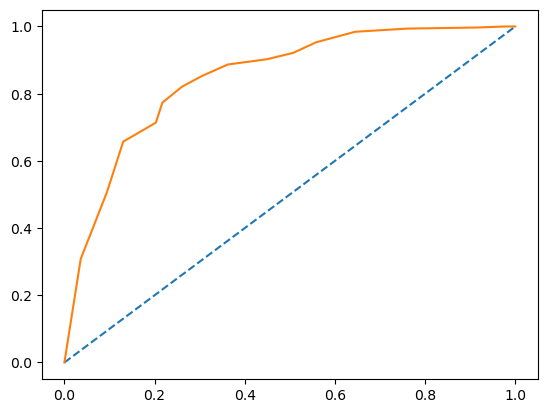

In [141]:
probs = KNN_model.predict_proba(scaled_X_test)
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Applying GridSearchCV for KNN model

In [142]:
params = {'n_neighbors':[9,11,13,15,17],
              'weights':['uniform', 'distance'],
          \
          'metric': ['euclidean', 'manhattan']}

In [143]:
model = KNeighborsClassifier()

In [144]:
grid_search = GridSearchCV(estimator = model, param_grid = params, cv = 5, n_jobs=1,scoring='accuracy')

In [145]:
grid_search.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [9, 11, 13, 15, 17],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [146]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'} 

KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')


In [147]:
best_model = grid_search.best_estimator_

In [148]:
# Prediction on the training set

ytrain_predict = best_model.predict(scaled_X_train)
ytest_predict = best_model.predict(scaled_X_test)

In [149]:
best_model

KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')

In [150]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(scaled_X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.865820,0.134180
1,0.000000,1.000000
2,0.145058,0.854942
3,0.634045,0.365955
4,0.000000,1.000000


In [151]:
grid_search.score(scaled_X_train,y_train)

0.9990574929311969

In [152]:
grid_search.score(scaled_X_test,y_test)

0.7894736842105263

In [153]:
# train data
print(metrics.confusion_matrix(y_train, ytrain_predict))
print(metrics.classification_report(y_train, ytrain_predict))

[[322   0]
 [  1 738]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       322
           1       1.00      1.00      1.00       739

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [154]:
# test data
print(metrics.confusion_matrix(y_test, ytest_predict))
print(metrics.classification_report(y_test, ytest_predict))

[[ 87  51]
 [ 45 273]]
              precision    recall  f1-score   support

           0       0.66      0.63      0.64       138
           1       0.84      0.86      0.85       318

    accuracy                           0.79       456
   macro avg       0.75      0.74      0.75       456
weighted avg       0.79      0.79      0.79       456



### AUC and ROC for the train data

AUC: 1.000


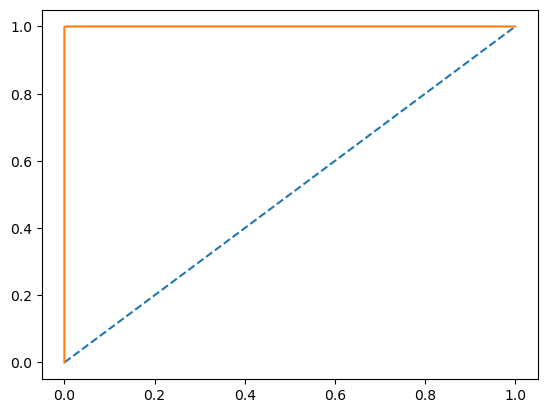

In [155]:
probs = grid_search.predict_proba(scaled_X_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 1.000


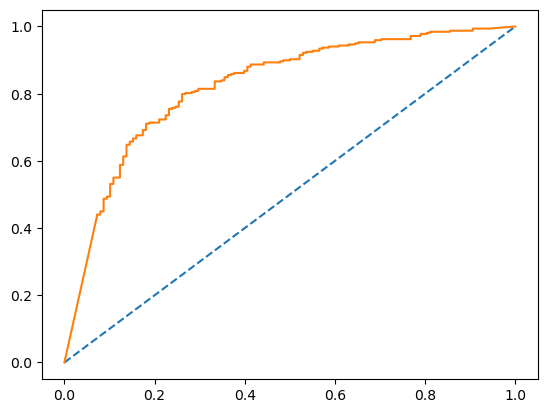

In [156]:
probs = grid_search.predict_proba(scaled_X_test)
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### b) Ensemble Learning - RandomForest Classifier

In [157]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=123)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [158]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9990574929311969
[[321   1]
 [  0 739]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       322
           1       1.00      1.00      1.00       739

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [159]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7916666666666666
[[ 87  51]
 [ 44 274]]
              precision    recall  f1-score   support

           0       0.66      0.63      0.65       138
           1       0.84      0.86      0.85       318

    accuracy                           0.79       456
   macro avg       0.75      0.75      0.75       456
weighted avg       0.79      0.79      0.79       456



### AUC and ROC for the train data

AUC: 1.000


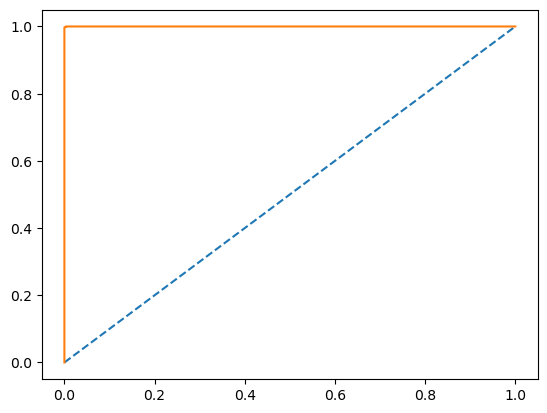

In [160]:
probs = RF_model.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 1.000


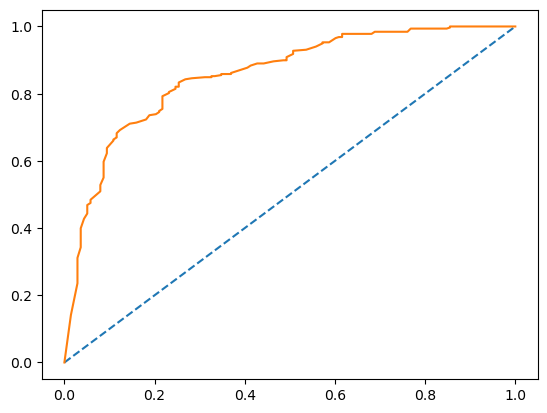

In [161]:
probs = RF_model.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Applying GridSearchCV for Random forest

In [162]:
param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [163]:
model1 = RandomForestClassifier(random_state=123)

In [164]:
grid_search = GridSearchCV(estimator=model1, param_grid=param, cv= 5)

In [165]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [166]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 500} 

RandomForestClassifier(max_depth=7, max_features='log2', n_estimators=500,
                       random_state=123)


In [167]:
best_model = grid_search.best_estimator_

In [168]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [169]:
best_model

RandomForestClassifier(max_depth=7, max_features='log2', n_estimators=500,
                       random_state=123)

In [170]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.723917,0.276083
1,0.009288,0.990712
2,0.041061,0.958939
3,0.559841,0.440159
4,0.046984,0.953016


In [171]:
grid_search.score(X_train,y_train)

0.9255419415645617

In [172]:
grid_search.score(X_test,y_test)

0.8026315789473685

In [173]:
# train data
print(metrics.confusion_matrix(y_train, ytrain_predict))
print(metrics.classification_report(y_train, ytrain_predict))

[[280  42]
 [ 37 702]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       322
           1       0.94      0.95      0.95       739

    accuracy                           0.93      1061
   macro avg       0.91      0.91      0.91      1061
weighted avg       0.93      0.93      0.93      1061



In [174]:
# test data
print(metrics.confusion_matrix(y_test, ytest_predict))
print(metrics.classification_report(y_test, ytest_predict))

[[ 86  52]
 [ 38 280]]
              precision    recall  f1-score   support

           0       0.69      0.62      0.66       138
           1       0.84      0.88      0.86       318

    accuracy                           0.80       456
   macro avg       0.77      0.75      0.76       456
weighted avg       0.80      0.80      0.80       456



### AUC and ROC for the train data

AUC: 0.973


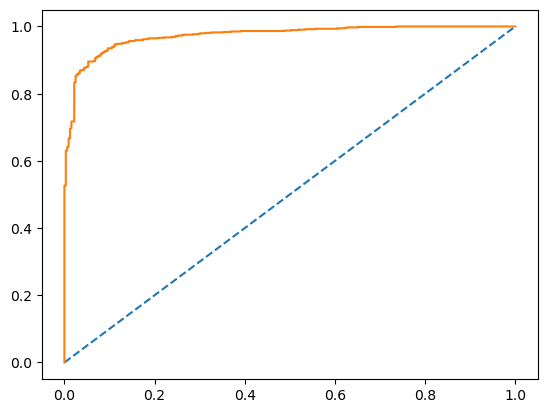

In [175]:
probs = grid_search.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 0.973


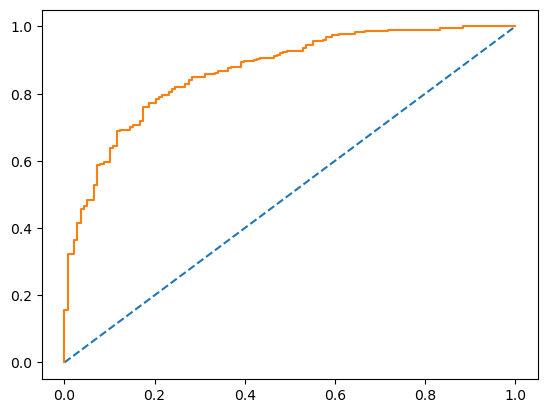

In [176]:
probs = grid_search.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### c) Ensemble Learning - Bagging

In [177]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=123)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=123)

In [178]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9990574929311969
[[321   1]
 [  0 739]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       322
           1       1.00      1.00      1.00       739

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [179]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7763157894736842
[[ 82  56]
 [ 46 272]]
              precision    recall  f1-score   support

           0       0.64      0.59      0.62       138
           1       0.83      0.86      0.84       318

    accuracy                           0.78       456
   macro avg       0.73      0.72      0.73       456
weighted avg       0.77      0.78      0.77       456



### AUC and ROC for the train data

AUC: 1.000


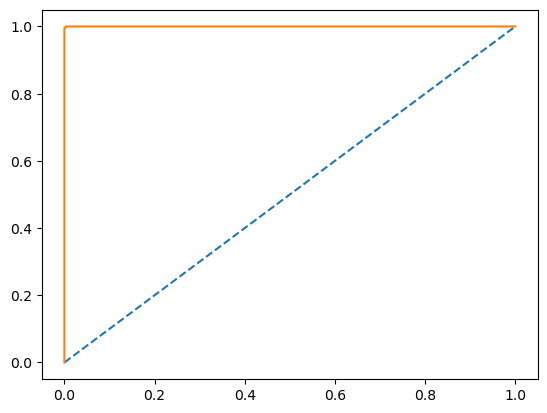

In [180]:
probs = Bagging_model.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 1.000


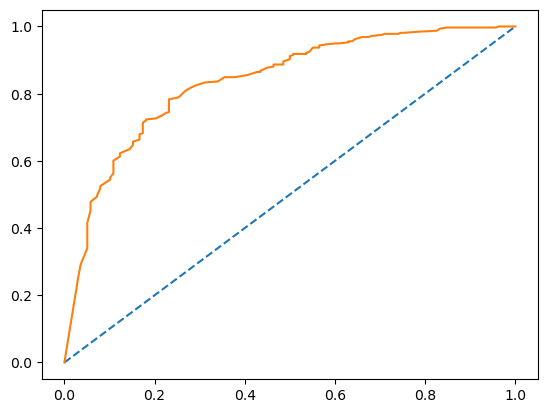

In [181]:
probs = Bagging_model.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Applying GridSearchCV for Ensemble Learning - Bagging

In [182]:
param = { 
    'n_estimators': [50, 100, 150],
    'random_state': [123],
}

In [183]:
model2 = BaggingClassifier(base_estimator = RF_model, n_estimators=100, random_state=123)

In [184]:
grid_search = GridSearchCV(estimator=model2, param_grid=param, cv= 5, n_jobs=4)

In [185]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=RandomForestClassifier(random_state=123),
                                         n_estimators=100, random_state=123),
             n_jobs=4,
             param_grid={'n_estimators': [50, 100, 150], 'random_state': [123]})

In [186]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'n_estimators': 50, 'random_state': 123} 

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=123),
                  n_estimators=50, random_state=123)


In [187]:
best_model = grid_search.best_estimator_

In [188]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [189]:
best_model

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=123),
                  n_estimators=50, random_state=123)

In [190]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.7474,0.2526
1,0.0036,0.9964
2,0.0968,0.9032
3,0.6208,0.3792
4,0.0144,0.9856


In [191]:
grid_search.score(X_train,y_train)

0.9698397737983034

In [192]:
grid_search.score(X_test,y_test)

0.8048245614035088

In [193]:
# train data
print(metrics.confusion_matrix(y_train, ytrain_predict))
print(metrics.classification_report(y_train, ytrain_predict))

[[300  22]
 [ 10 729]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       322
           1       0.97      0.99      0.98       739

    accuracy                           0.97      1061
   macro avg       0.97      0.96      0.96      1061
weighted avg       0.97      0.97      0.97      1061



In [194]:
# test data
print(metrics.confusion_matrix(y_test, ytest_predict))
print(metrics.classification_report(y_test, ytest_predict))

[[ 85  53]
 [ 36 282]]
              precision    recall  f1-score   support

           0       0.70      0.62      0.66       138
           1       0.84      0.89      0.86       318

    accuracy                           0.80       456
   macro avg       0.77      0.75      0.76       456
weighted avg       0.80      0.80      0.80       456



### AUC and ROC for the train data

AUC: 0.997


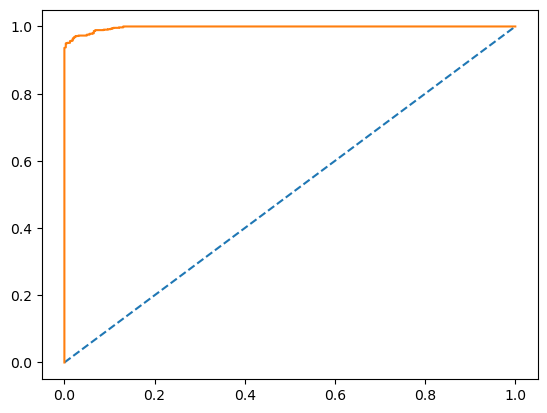

In [195]:
probs = grid_search.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 0.997


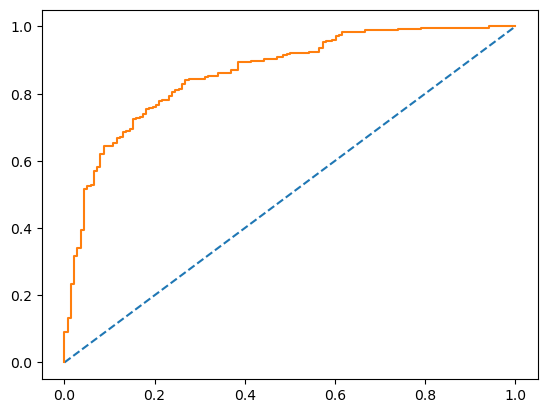

In [196]:
probs = grid_search.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### d) Ensemble Learning - AdaBoosting

In [197]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [198]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8567389255419415
[[234  88]
 [ 64 675]]
              precision    recall  f1-score   support

           0       0.79      0.73      0.75       322
           1       0.88      0.91      0.90       739

    accuracy                           0.86      1061
   macro avg       0.83      0.82      0.83      1061
weighted avg       0.85      0.86      0.86      1061



In [199]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8135964912280702
[[ 87  51]
 [ 34 284]]
              precision    recall  f1-score   support

           0       0.72      0.63      0.67       138
           1       0.85      0.89      0.87       318

    accuracy                           0.81       456
   macro avg       0.78      0.76      0.77       456
weighted avg       0.81      0.81      0.81       456



### AUC and ROC for the train data

AUC: 0.923


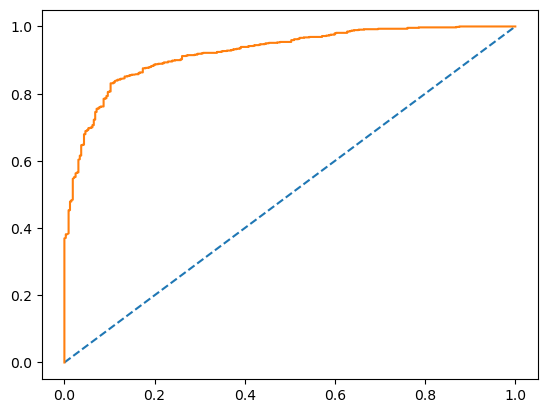

In [200]:
probs = ADB_model.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 0.923


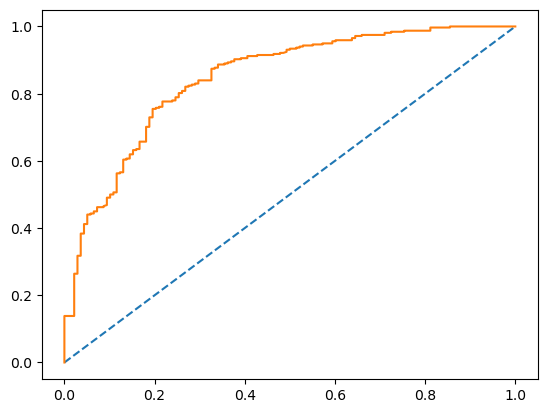

In [201]:
probs = ADB_model.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Applying GridSearchCV for Ensemble Learning - Adaboosting

In [202]:
param = { 
    'n_estimators': [50, 100, 150],
    'learning_rate': [1.0, 0.001, 0.01, 0.2, 0.3],
    'algorithm': ['SAMME']
}

In [203]:
model3 = AdaBoostClassifier(random_state=123)

In [204]:
grid_search = GridSearchCV(estimator=model3, param_grid=param, cv= 5, n_jobs=4)

In [205]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=123), n_jobs=4,
             param_grid={'algorithm': ['SAMME'],
                         'learning_rate': [1.0, 0.001, 0.01, 0.2, 0.3],
                         'n_estimators': [50, 100, 150]})

In [206]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 50} 

AdaBoostClassifier(algorithm='SAMME', random_state=123)


In [207]:
best_model = grid_search.best_estimator_

In [208]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [209]:
best_model

AdaBoostClassifier(algorithm='SAMME', random_state=123)

In [210]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.520855,0.479145
1,0.311191,0.688809
2,0.416408,0.583592
3,0.485121,0.514879
4,0.409492,0.590508


In [211]:
grid_search.score(X_train,y_train)

0.8444863336475024

In [212]:
grid_search.score(X_test,y_test)

0.8135964912280702

In [213]:
# train data
print(metrics.confusion_matrix(y_train, ytrain_predict))
print(metrics.classification_report(y_train, ytrain_predict))

[[231  91]
 [ 74 665]]
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       322
           1       0.88      0.90      0.89       739

    accuracy                           0.84      1061
   macro avg       0.82      0.81      0.81      1061
weighted avg       0.84      0.84      0.84      1061



In [214]:
# test data
print(metrics.confusion_matrix(y_test, ytest_predict))
print(metrics.classification_report(y_test, ytest_predict))

[[ 89  49]
 [ 36 282]]
              precision    recall  f1-score   support

           0       0.71      0.64      0.68       138
           1       0.85      0.89      0.87       318

    accuracy                           0.81       456
   macro avg       0.78      0.77      0.77       456
weighted avg       0.81      0.81      0.81       456



### AUC and ROC for the train data

AUC: 0.903


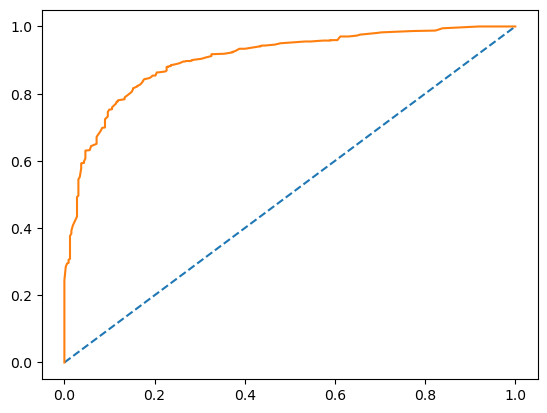

In [215]:
probs = grid_search.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 0.903


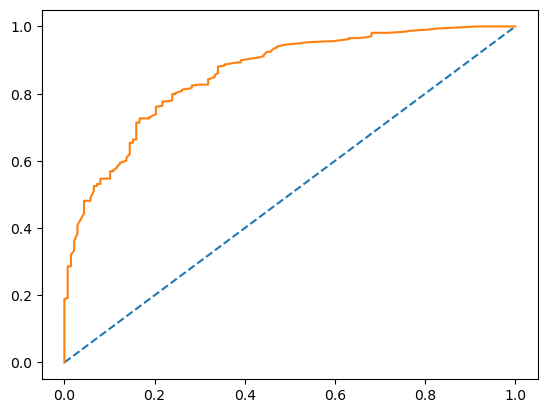

In [216]:
probs = grid_search.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### e) Ensemble Learning - GradientBoost

In [217]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [218]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8982092365692743
[[260  62]
 [ 46 693]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       322
           1       0.92      0.94      0.93       739

    accuracy                           0.90      1061
   macro avg       0.88      0.87      0.88      1061
weighted avg       0.90      0.90      0.90      1061



In [219]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8004385964912281
[[ 85  53]
 [ 38 280]]
              precision    recall  f1-score   support

           0       0.69      0.62      0.65       138
           1       0.84      0.88      0.86       318

    accuracy                           0.80       456
   macro avg       0.77      0.75      0.76       456
weighted avg       0.80      0.80      0.80       456



### AUC and ROC for the train data

AUC: 0.955


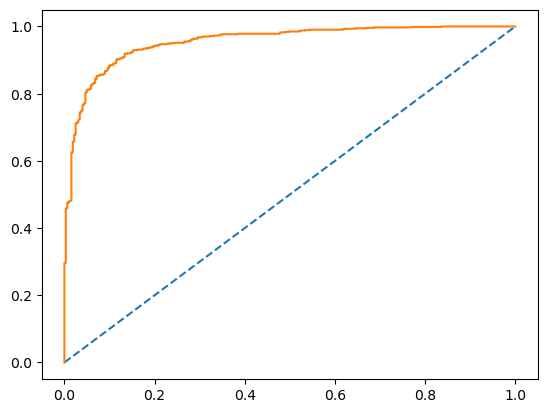

In [220]:
probs = gbcl.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 0.955


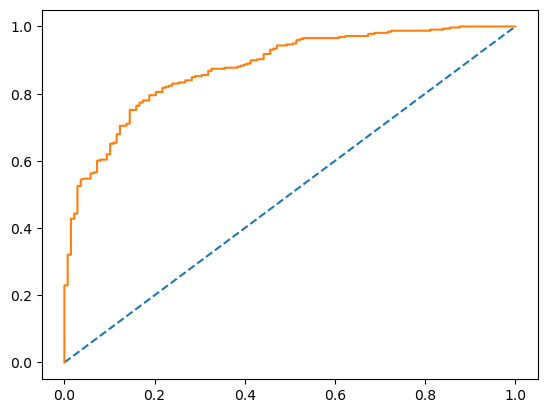

In [221]:
probs = gbcl.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Applying GridSearchCV for Ensemble Learning - GradientBoost

In [222]:
param = { 
    'n_estimators': [50, 100, 150],
    'learning_rate': [1.0, 0.001, 0.01, 0.2, 0.3],
}

In [223]:
model4 = GradientBoostingClassifier(random_state=123)

In [224]:
grid_search = GridSearchCV(estimator=model4, param_grid=param, cv= 5, n_jobs=4)

In [225]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=123),
             n_jobs=4,
             param_grid={'learning_rate': [1.0, 0.001, 0.01, 0.2, 0.3],
                         'n_estimators': [50, 100, 150]})

In [226]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'learning_rate': 0.2, 'n_estimators': 100} 

GradientBoostingClassifier(learning_rate=0.2, random_state=123)


In [227]:
best_model = grid_search.best_estimator_

In [228]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [229]:
best_model

GradientBoostingClassifier(learning_rate=0.2, random_state=123)

In [230]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.725545,0.274455
1,0.000703,0.999297
2,0.030893,0.969107
3,0.618324,0.381676
4,0.012714,0.987286


In [231]:
grid_search.score(X_train,y_train)

0.9227144203581527

In [232]:
grid_search.score(X_test,y_test)

0.7960526315789473

In [233]:
# train data
print(metrics.confusion_matrix(y_train, ytrain_predict))
print(metrics.classification_report(y_train, ytrain_predict))

[[275  47]
 [ 35 704]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       322
           1       0.94      0.95      0.94       739

    accuracy                           0.92      1061
   macro avg       0.91      0.90      0.91      1061
weighted avg       0.92      0.92      0.92      1061



In [234]:
# test data
print(metrics.confusion_matrix(y_test, ytest_predict))
print(metrics.classification_report(y_test, ytest_predict))

[[ 87  51]
 [ 42 276]]
              precision    recall  f1-score   support

           0       0.67      0.63      0.65       138
           1       0.84      0.87      0.86       318

    accuracy                           0.80       456
   macro avg       0.76      0.75      0.75       456
weighted avg       0.79      0.80      0.79       456



### AUC and ROC for the train data

AUC: 0.973


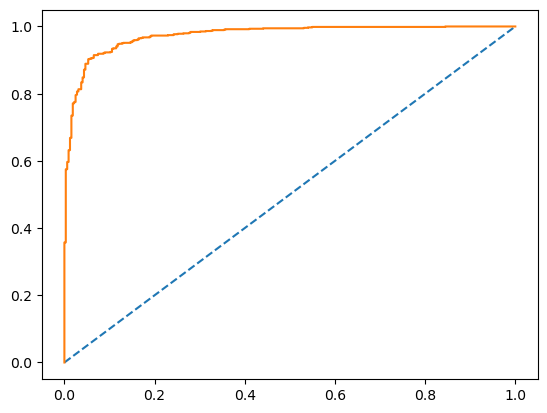

In [235]:
probs = grid_search.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 0.973


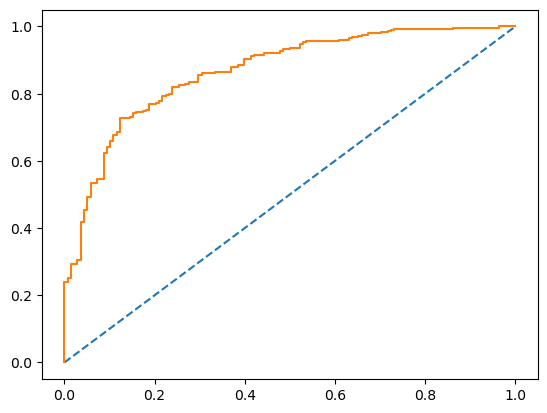

In [236]:
probs = grid_search.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### f) Logistic regression

In [237]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train_over, y_train_over)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    5.1s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [238]:
ytrain_predict = model.predict(X_train_over)
ytest_predict = model.predict(scaled_X_test)

### Predicting on Training and Test dataset

In [239]:
model.predict_proba(X_train_over)

array([[0.00864217, 0.99135783],
       [0.93993231, 0.06006769],
       [0.09012599, 0.90987401],
       ...,
       [0.87322012, 0.12677988],
       [0.94065167, 0.05934833],
       [0.46912457, 0.53087543]])

### Getting the Predicted Classes and Probs

In [240]:
ytest_predict_prob=model.predict_proba(scaled_X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.841338,0.158662
1,0.005966,0.994034
2,0.063849,0.936151
3,0.467016,0.532984
4,0.131644,0.868356


In [241]:
# Accuracy - Training Data
model.score(X_train_over, y_train_over)

0.8342354533152909

In [242]:
print(metrics.confusion_matrix(y_train_over, ytrain_predict))
print(classification_report(y_train_over, ytrain_predict))

[[620 119]
 [126 613]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       739
           1       0.84      0.83      0.83       739

    accuracy                           0.83      1478
   macro avg       0.83      0.83      0.83      1478
weighted avg       0.83      0.83      0.83      1478



In [243]:
# Accuracy - Test Data
model.score(scaled_X_test, y_test)

0.8004385964912281

In [244]:
print(confusion_matrix(y_test, ytest_predict))
print(classification_report(y_test, ytest_predict))

[[106  32]
 [ 59 259]]
              precision    recall  f1-score   support

           0       0.64      0.77      0.70       138
           1       0.89      0.81      0.85       318

    accuracy                           0.80       456
   macro avg       0.77      0.79      0.78       456
weighted avg       0.82      0.80      0.80       456



### AUC and ROC for the train data

AUC: 0.903


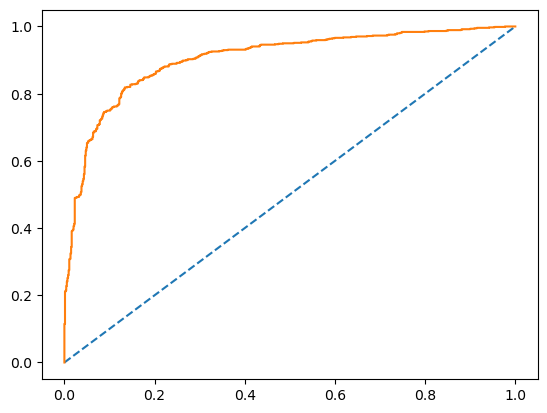

In [245]:
probs = model.predict_proba(X_train_over)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_over, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_over, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 0.903


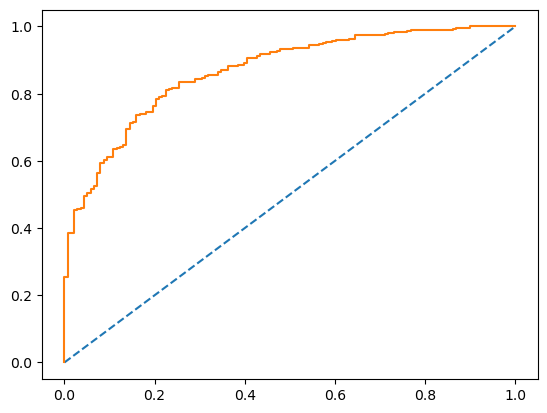

In [246]:
probs = model.predict_proba(scaled_X_test)
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Applying GridSearchCV for Logistic Regression

In [247]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [248]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [249]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [250]:
grid_search.fit(X_train_over, y_train_over)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [251]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag')


In [252]:
best_model = grid_search.best_estimator_

In [253]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train_over)
ytest_predict = best_model.predict(scaled_X_test)

In [254]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(scaled_X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.820297,0.179703
1,0.008557,0.991443
2,0.079413,0.920587
3,0.461957,0.538043
4,0.150169,0.849831


In [255]:
## Confusion matrix on the training data
print(grid_search.score(X_train_over, y_train_over))
print(metrics.confusion_matrix(y_train_over, ytrain_predict))
print(classification_report(y_train_over, ytrain_predict),'\n');

0.8336727766463
[[619 120]
 [125 614]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       739
           1       0.84      0.83      0.83       739

    accuracy                           0.83      1478
   macro avg       0.83      0.83      0.83      1478
weighted avg       0.83      0.83      0.83      1478
 



In [256]:
## Confusion matrix on the test data
print(grid_search.score(scaled_X_test, y_test))
print(confusion_matrix(y_test, ytest_predict))
print(classification_report(y_test, ytest_predict),'\n');

0.8505747126436782
[[106  32]
 [ 59 259]]
              precision    recall  f1-score   support

           0       0.64      0.77      0.70       138
           1       0.89      0.81      0.85       318

    accuracy                           0.80       456
   macro avg       0.77      0.79      0.78       456
weighted avg       0.82      0.80      0.80       456
 



### AUC and ROC for the train data

AUC: 0.903


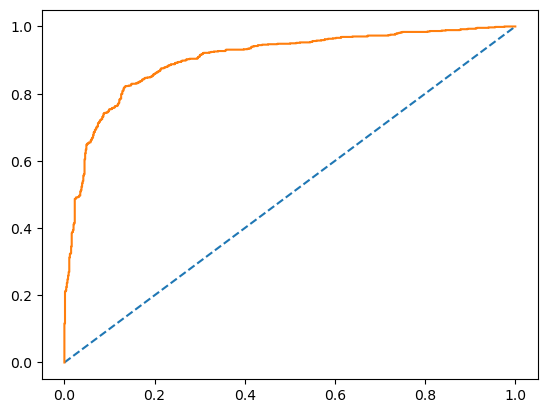

In [257]:
probs = grid_search.predict_proba(X_train_over)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_over, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_over, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 0.903


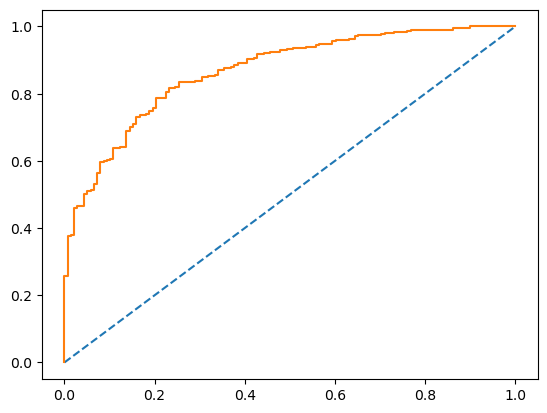

In [258]:
probs = grid_search.predict_proba(scaled_X_test)
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### g) LDA

In [259]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model1=clf.fit(X_train_over,y_train_over)

In [260]:
ytrain_predict_LDA = model1.predict(X_train_over)
ytest_predict_LDA = model1.predict(scaled_X_test)

### Predicting on Training and Test dataset

In [261]:
model1.predict_proba(X_train_over)

array([[0.00424874, 0.99575126],
       [0.95774766, 0.04225234],
       [0.06379139, 0.93620861],
       ...,
       [0.88505049, 0.11494951],
       [0.96189159, 0.03810841],
       [0.46384007, 0.53615993]])

### Getting the Predicted Classes and Probs

In [262]:
ytest_predict_prob=model1.predict_proba(scaled_X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.857482,0.142518
1,0.003275,0.996725
2,0.050291,0.949709
3,0.454824,0.545176
4,0.108725,0.891275


In [263]:
# Accuracy - Training Data
model1.score(X_train_over, y_train_over)

0.8322056833558863

### AUC and ROC for the training data

AUC: 0.903


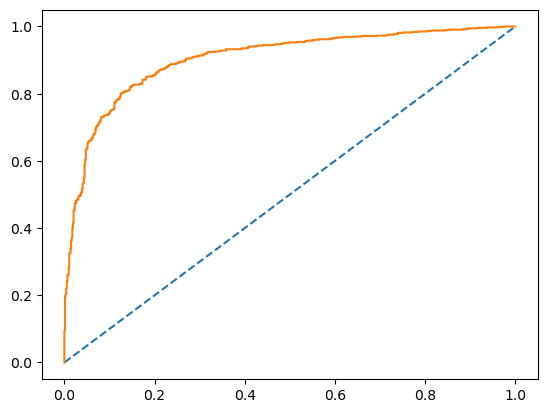

In [264]:
probs = model1.predict_proba(X_train_over)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_over, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_over, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [265]:
# Accuracy - Test Data
model1.score(scaled_X_test, y_test)

0.7982456140350878

### AUC and ROC for the test data

AUC: 0.903


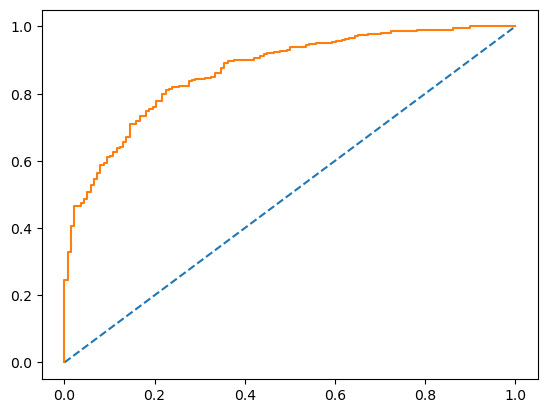

In [266]:
probs = model1.predict_proba(scaled_X_test)
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion Matrix for the training data

In [267]:
confusion_matrix(y_train_over, ytrain_predict_LDA)

array([[618, 121],
       [127, 612]], dtype=int64)

In [268]:
print(classification_report(y_train_over, ytrain_predict_LDA))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       739
           1       0.83      0.83      0.83       739

    accuracy                           0.83      1478
   macro avg       0.83      0.83      0.83      1478
weighted avg       0.83      0.83      0.83      1478



### Confusion Matrix for test data

In [269]:
confusion_matrix(y_test, ytest_predict_LDA)

array([[106,  32],
       [ 60, 258]], dtype=int64)

In [270]:
print(classification_report(y_test, ytest_predict_LDA))

              precision    recall  f1-score   support

           0       0.64      0.77      0.70       138
           1       0.89      0.81      0.85       318

    accuracy                           0.80       456
   macro avg       0.76      0.79      0.77       456
weighted avg       0.81      0.80      0.80       456



## Applying GridSearchCV for LDA

In [271]:
grid={ 'solver':['svd'],
      'tol':[0.0001,0.00001]}

In [272]:
model = LinearDiscriminantAnalysis()

In [273]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [274]:
grid_search.fit(X_train_over, y_train_over)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd'], 'tol': [0.0001, 1e-05]},
             scoring='f1')

In [275]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'solver': 'svd', 'tol': 0.0001} 

LinearDiscriminantAnalysis()


In [276]:
best_model = grid_search.best_estimator_

In [277]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train_over)
ytest_predict = best_model.predict(scaled_X_test)

In [278]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(scaled_X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.857482,0.142518
1,0.003275,0.996725
2,0.050291,0.949709
3,0.454824,0.545176
4,0.108725,0.891275


In [279]:
## Confusion matrix on the training data
print(grid_search.score(X_train_over, y_train_over))
print(metrics.confusion_matrix(y_train_over, ytrain_predict))
print(classification_report(y_train_over, ytrain_predict),'\n');

0.8315217391304347
[[618 121]
 [127 612]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       739
           1       0.83      0.83      0.83       739

    accuracy                           0.83      1478
   macro avg       0.83      0.83      0.83      1478
weighted avg       0.83      0.83      0.83      1478
 



In [280]:
## Confusion matrix on the test data
print(grid_search.score(scaled_X_test, y_test))
print(confusion_matrix(y_test, ytest_predict))
print(classification_report(y_test, ytest_predict),'\n');

0.8486842105263157
[[106  32]
 [ 60 258]]
              precision    recall  f1-score   support

           0       0.64      0.77      0.70       138
           1       0.89      0.81      0.85       318

    accuracy                           0.80       456
   macro avg       0.76      0.79      0.77       456
weighted avg       0.81      0.80      0.80       456
 



### AUC and ROC for the train data

AUC: 0.903


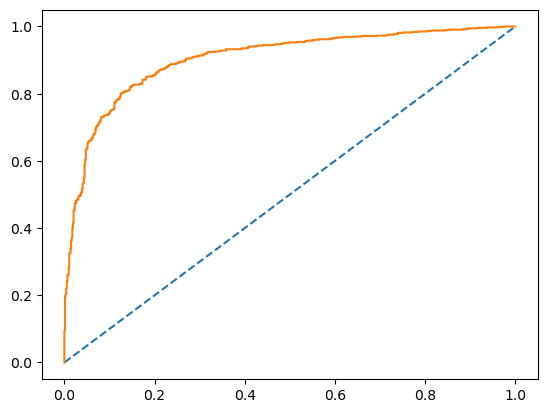

In [281]:
probs = grid_search.predict_proba(X_train_over)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_over, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_over, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 0.903


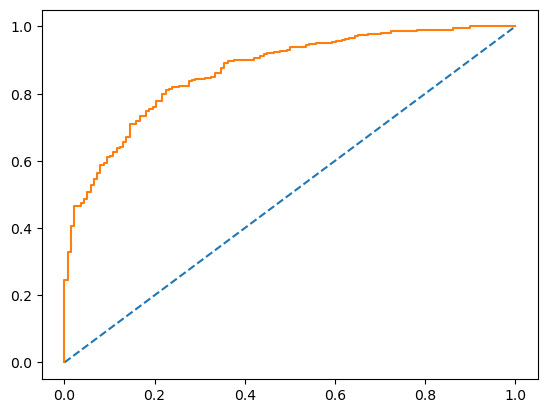

In [282]:
probs = grid_search.predict_proba(scaled_X_test)
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### h) Naive Bayes

In [283]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

**Performance Matrix on train data set**

In [284]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                   
print(model_score)

0.8397737983034873


In [285]:
# confusion_matrix
print(metrics.confusion_matrix(y_train, y_train_predict))

[[232  90]
 [ 80 659]]


In [286]:
# classification_report
print(metrics.classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       322
           1       0.88      0.89      0.89       739

    accuracy                           0.84      1061
   macro avg       0.81      0.81      0.81      1061
weighted avg       0.84      0.84      0.84      1061



In [287]:
# Accuracy of train data
NB_model.score(X_train, y_train)

0.8397737983034873

**Performance Matrix on test data set**

In [288]:
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)

0.8289473684210527


In [289]:
# confusion_matrix
print(metrics.confusion_matrix(y_test, y_test_predict))        

[[ 97  41]
 [ 37 281]]


In [290]:
# classification_report
print(metrics.classification_report(y_test, y_test_predict)) 

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       138
           1       0.87      0.88      0.88       318

    accuracy                           0.83       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



In [291]:
# Accuracy of test data
NB_model.score(X_test, y_test)

0.8289473684210527

### AUC and ROC for the train data

AUC: 0.896


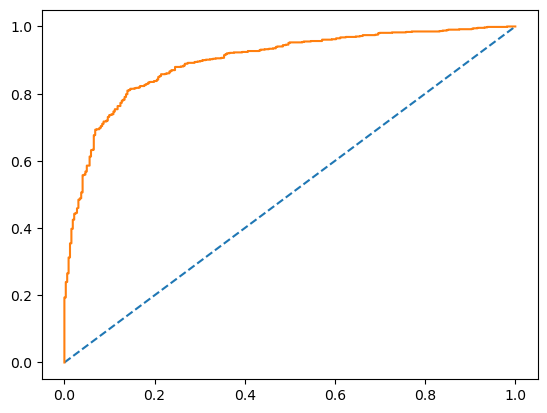

In [292]:
probs = NB_model.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 0.896


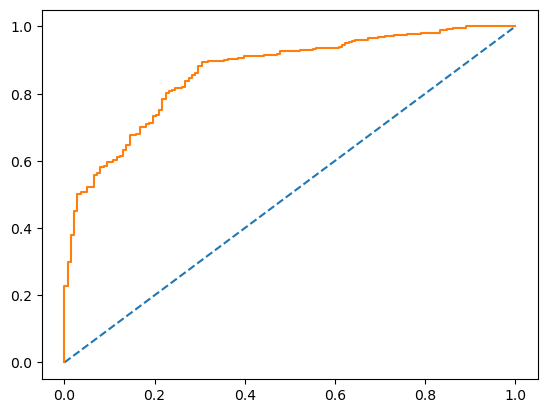

In [293]:
probs = NB_model.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Applying GridSearchCV for NB model

In [294]:
grid={ 'var_smoothing':[1,0.1,0.01,0.001],
      }

In [295]:
model = GaussianNB()

In [296]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [297]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1, 0.1, 0.01, 0.001]}, scoring='f1')

In [298]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'var_smoothing': 0.001} 

GaussianNB(var_smoothing=0.001)


In [299]:
best_model = grid_search.best_estimator_

In [300]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [301]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.764771,0.235229
1,0.000326,0.999674
2,0.029889,0.970111
3,0.252997,0.747003
4,0.076811,0.923189


In [302]:
## Confusion matrix on the training data
print(grid_search.score(X_train, y_train))
print(metrics.confusion_matrix(y_train, ytrain_predict))
print(classification_report(y_train, ytrain_predict),'\n');

0.8850267379679144
[[227  95]
 [ 77 662]]
              precision    recall  f1-score   support

           0       0.75      0.70      0.73       322
           1       0.87      0.90      0.89       739

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061
 



In [303]:
## Confusion matrix on the test data
print(grid_search.score(X_test, y_test))
print(confusion_matrix(y_test, ytest_predict))
print(classification_report(y_test, ytest_predict),'\n');

0.869158878504673
[[ 93  45]
 [ 39 279]]
              precision    recall  f1-score   support

           0       0.70      0.67      0.69       138
           1       0.86      0.88      0.87       318

    accuracy                           0.82       456
   macro avg       0.78      0.78      0.78       456
weighted avg       0.81      0.82      0.81       456
 



### AUC and ROC for the train data

AUC: 0.896


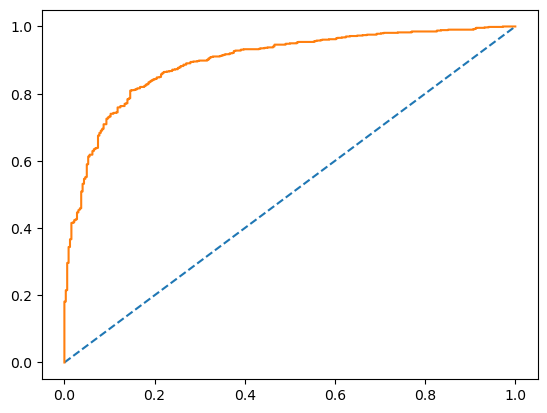

In [304]:
probs = grid_search.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 0.896


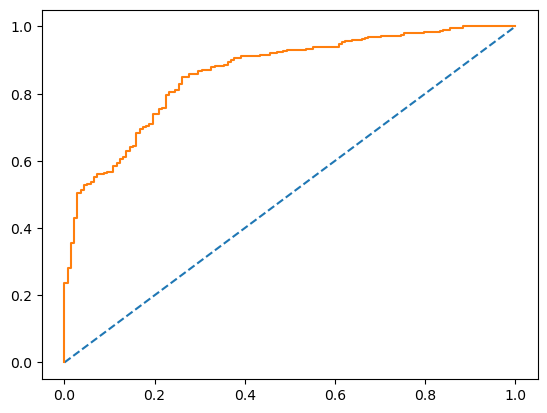

In [305]:
probs = grid_search.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## 1.8) Ans: Refer business report

# Problem 2

In [306]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [307]:
df_ta=pd.DataFrame({'Name':['Roosevelt','Kennedy','Nixon'],
                    'Speech':[inaugural.raw('1941-Roosevelt.txt'),
                            inaugural.raw('1961-Kennedy.txt'), 
                            inaugural.raw('1973-Nixon.txt')]})

## 2.1) Ans: 

In [308]:
df_ta

,Name,Speech
0,Roosevelt,On each national day of inauguration since 178...
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


In [309]:
# i) Number of characters
df_characters = df_ta.copy()
df_characters['char_count'] = df_characters['Speech'].str.len()
df_characters

,Name,Speech,char_count
0,Roosevelt,On each national day of inauguration since 178...,7571
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991


In [310]:
# ii) Number of words
df_words = df_ta.copy()
df_words['word_count'] = df_words['Speech'].apply(lambda x: len(str(x).split(' ')))
df_words

,Name,Speech,word_count
0,Roosevelt,On each national day of inauguration since 178...,1323
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769


In [311]:
# iii) Number of sentences
from nltk.tokenize import sent_tokenize
df_sentences = df_ta.copy()
df_sentences['sentence_count'] = df_sentences['Speech'].apply(lambda x: len(sent_tokenize(x)))
df_sentences

,Name,Speech,sentence_count
0,Roosevelt,On each national day of inauguration since 178...,68
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",52
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",68


## 2.2) Ans: 

**Counting stopwords**

In [312]:
df_ta_stopword_count=df_ta.copy()
from nltk.corpus import stopwords
stop = stopwords.words('english')

df_ta_stopword_count['stopwords'] = df_ta_stopword_count['Speech'].apply(lambda x: len([x for x in x.split() if x in stop]))
df_ta_stopword_count.head()

,Name,Speech,stopwords
0,Roosevelt,On each national day of inauguration since 178...,632
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",618
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",899


**Removing stopwords**

In [313]:
stop = stopwords.words('english')
df_ta['Speech'] = df_ta['Speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_ta.head()

,Name,Speech
0,Roosevelt,"On national day inauguration since 1789, peopl..."
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


In [314]:
# Number of words after removing stopwords
df_ta['word_count_after_removing_stopwords'] = df_ta['Speech'].apply(lambda x: len(str(x).split(' ')))
df_ta

,Name,Speech,word_count_after_removing_stopwords
0,Roosevelt,"On national day inauguration since 1789, peopl...",728
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",772
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",920


In [315]:
df_ta.drop('word_count_after_removing_stopwords', axis=1, inplace=True)

**Lowercase conversion**

In [316]:
# Lowercase conversion
df_ta['Speech'] = df_ta['Speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_ta.head()

,Name,Speech
0,Roosevelt,"on national day inauguration since 1789, peopl..."
1,Kennedy,"vice president johnson, mr. speaker, mr. chief..."
2,Nixon,"mr. vice president, mr. speaker, mr. chief jus..."


**Removal of punctuation and special characters**

In [317]:
df_ta['Speech'] = df_ta['Speech'].str.replace('[^\w\s]','')
df_ta['Speech'] = df_ta['Speech'].str.replace('@','#')
df_ta.head()

,Name,Speech
0,Roosevelt,on national day inauguration since 1789 people...
1,Kennedy,vice president johnson mr speaker mr chief jus...
2,Nixon,mr vice president mr speaker mr chief justice ...


**Stemming**

In [318]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df_ta['Speech'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    on nation day inaugur sinc 1789 peopl renew se...
1    vice presid johnson mr speaker mr chief justic...
2    mr vice presid mr speaker mr chief justic sena...
Name: Speech, dtype: object

In [319]:
pd.options.display.max_colwidth=1000

In [320]:
df_ta

,Name,Speech
0,Roosevelt,on national day inauguration since 1789 people renewed sense dedication united states in washingtons day task people create weld together nation in lincolns day task people preserve nation disruption within in day task people save nation institutions disruption without to us come time midst swift happenings pause moment take stock recall place history been rediscover may be if not risk real peril inaction lives nations determined count years lifetime human spirit the life man threescore years ten little more little less the life nation fullness measure live there men doubt this there men believe democracy form government frame life limited measured kind mystical artificial fate that unexplained reason tyranny slavery become surging wave future freedom ebbing tide but americans know true eight years ago life republic seemed frozen fatalistic terror proved true we midst shock acted we acted quickly boldly decisively these later years living years fruitful years people democracy f...
1,Kennedy,vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change for i sworn i almighty god solemn oath forebears l prescribed nearly century three quarters ago the world different now for man holds mortal hands power abolish forms human poverty forms human life and yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state hand god we dare forget today heirs first revolution let word go forth time place friend foe alike torch passed new generation americans born century tempered war disciplined hard bitter peace proud ancient heritage unwilling witness permit slow undoing human rights nation always committed committed today home around world let every nation know whether wishes us well ill shall pay price bear burden meet hardship support frien...
2,Nixon,mr vice president mr speaker mr chief justice senator cook mrs eisenhower fellow citizens great good country share together when met four years ago america bleak spirit depressed prospect seemingly endless war abroad destructive conflict home as meet today stand threshold new era peace world the central question us is how shall use peace let us resolve era enter postwar periods often been time retreat isolation leads stagnation home invites new danger abroad let us resolve become time great responsibilities greatly borne renew spirit promise america enter third century nation this past year saw farreaching results new policies peace by continuing revitalize traditional friendships missions peking moscow able establish base new durable pattern relationships among nations world because americas bold initiatives 1972 long remembered year greatest progress since end world war ii toward lasting peace world the peace seek world flimsy peace merely interlude wars peace endure generations ...


In [321]:
df_ta['word_count'] = df_ta['Speech'].apply(lambda x: len(str(x).split(' ')))
df_ta

,Name,Speech,word_count
0,Roosevelt,on national day inauguration since 1789 people renewed sense dedication united states in washingtons day task people create weld together nation in lincolns day task people preserve nation disruption within in day task people save nation institutions disruption without to us come time midst swift happenings pause moment take stock recall place history been rediscover may be if not risk real peril inaction lives nations determined count years lifetime human spirit the life man threescore years ten little more little less the life nation fullness measure live there men doubt this there men believe democracy form government frame life limited measured kind mystical artificial fate that unexplained reason tyranny slavery become surging wave future freedom ebbing tide but americans know true eight years ago life republic seemed frozen fatalistic terror proved true we midst shock acted we acted quickly boldly decisively these later years living years fruitful years people democracy f...,728
1,Kennedy,vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change for i sworn i almighty god solemn oath forebears l prescribed nearly century three quarters ago the world different now for man holds mortal hands power abolish forms human poverty forms human life and yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state hand god we dare forget today heirs first revolution let word go forth time place friend foe alike torch passed new generation americans born century tempered war disciplined hard bitter peace proud ancient heritage unwilling witness permit slow undoing human rights nation always committed committed today home around world let every nation know whether wishes us well ill shall pay price bear burden meet hardship support frien...,772
2,Nixon,mr vice president mr speaker mr chief justice senator cook mrs eisenhower fellow citizens great good country share together when met four years ago america bleak spirit depressed prospect seemingly endless war abroad destructive conflict home as meet today stand threshold new era peace world the central question us is how shall use peace let us resolve era enter postwar periods often been time retreat isolation leads stagnation home invites new danger abroad let us resolve become time great responsibilities greatly borne renew spirit promise america enter third century nation this past year saw farreaching results new policies peace by continuing revitalize traditional friendships missions peking moscow able establish base new durable pattern relationships among nations world because americas bold initiatives 1972 long remembered year greatest progress since end world war ii toward lasting peace world the peace seek world flimsy peace merely interlude wars peace endure generations ...,920


In [322]:
pd.options.display.max_colwidth=50

## 2.3) Ans: 

In [323]:
freq = pd.Series(' '.join(df_ta['Speech']).split()).value_counts()[:5]
freq

us       46
let      39
world    27
new      26
peace    23
dtype: int64

In [324]:
freq1 = df_ta [df_ta['Name'] == 'Roosevelt']
freq2 = df_ta [df_ta['Name'] == 'Kennedy']
freq3 = df_ta [df_ta['Name'] == 'Nixon']

In [325]:
freq_Roosevelt = pd.Series(' '.join(freq1['Speech']).split()).value_counts()[:3]
freq_Roosevelt

it        13
nation    11
know      10
dtype: int64

In [326]:
freq_Kennedy = pd.Series(' '.join(freq2['Speech']).split()).value_counts()[:3]
freq_Kennedy

let      16
us       12
sides     8
dtype: int64

In [327]:
freq_Nixon = pd.Series(' '.join(freq3['Speech']).split()).value_counts()[:3]
freq_Nixon

us       26
let      22
peace    19
dtype: int64

## 2.4) Ans: 

Word Cloud of Roosevelt's Speech (after cleaning)!!


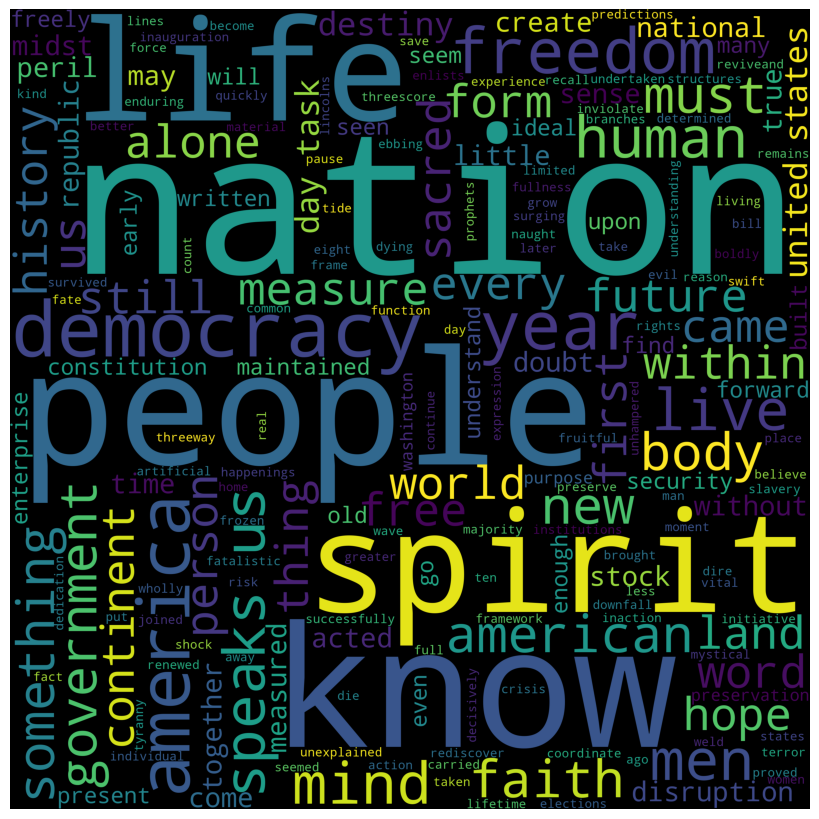

In [328]:
# Word Cloud of Roosevelt's Speech
from wordcloud import WordCloud
freq_R = ' '.join(df_ta.iloc[0:1,1])
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(freq_R) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud of Roosevelt's Speech (after cleaning)!!")
plt.show()

Word Cloud of Kennedy's Speech (after cleaning)!!


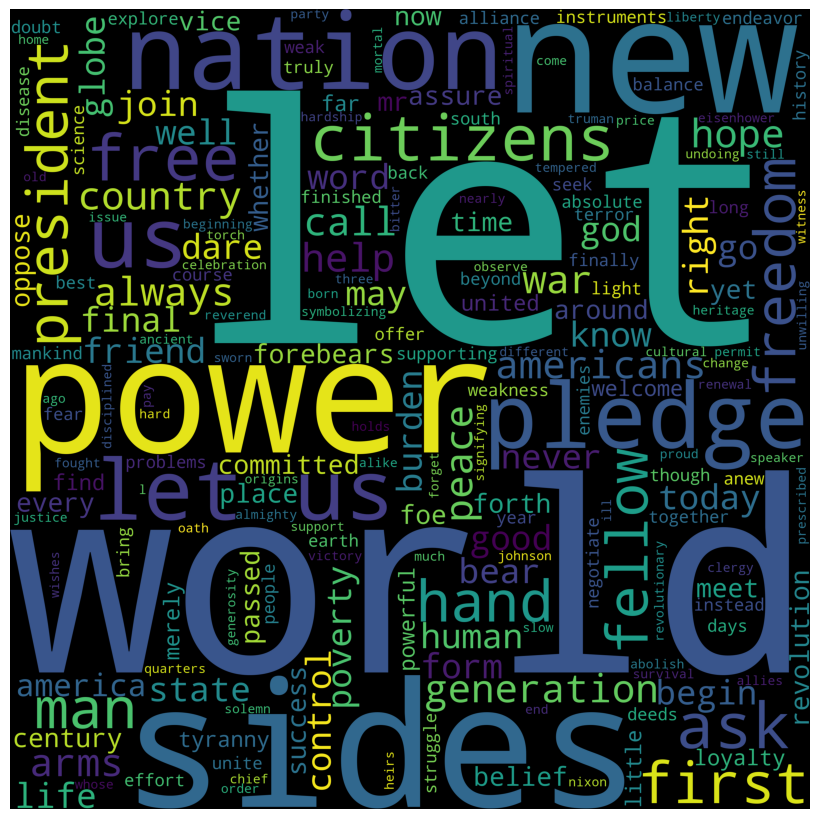

In [329]:
# Word Cloud of Kennedy's Speech
from wordcloud import WordCloud
freq_K = ' '.join(df_ta.iloc[1:2,1])
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(freq_K) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud of Kennedy's Speech (after cleaning)!!")
plt.show()


Word Cloud of Nixon's Speech (after cleaning)!!


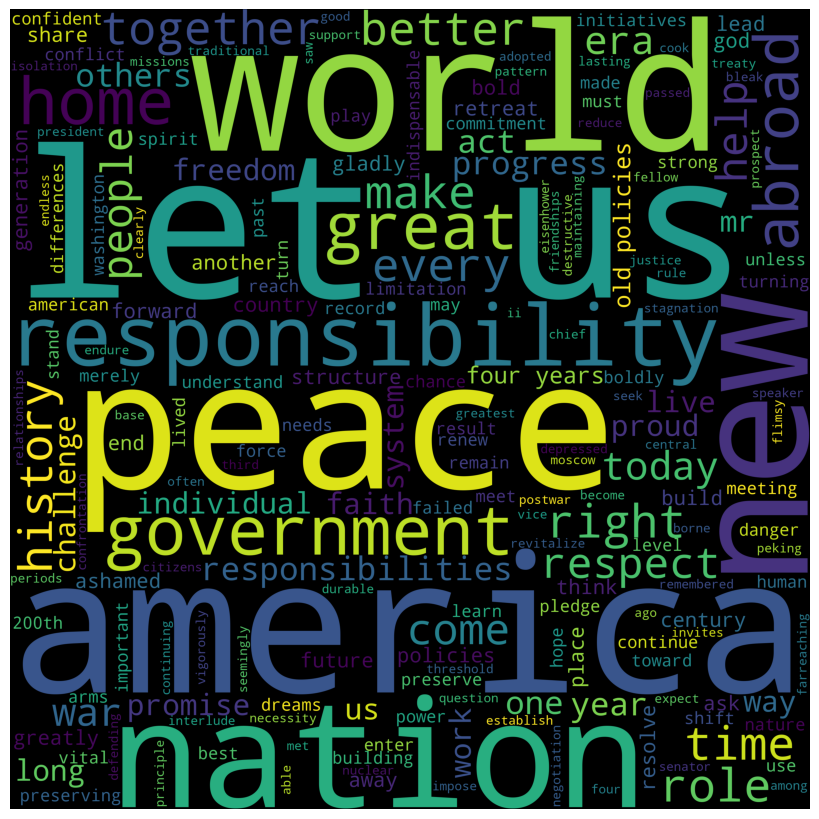

In [330]:
# Word Cloud of Nixon's Speech
from wordcloud import WordCloud
freq_N = ' '.join(df_ta.iloc[2:3,1])
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(freq_N) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud of Nixon's Speech (after cleaning)!!")
plt.show()
